In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt # 다운 받은 글꼴 plt에 적용
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
dfloan_train = pd.read_csv('/home/piai/test/Data3/auto_loan_train.csv', encoding = 'euc-kr')
dfc_train = pd.read_csv('/home/piai/test/Data3/auto_customer_train.csv', encoding = 'euc-kr')
dfloan_test = pd.read_csv('/home/piai/test/Data3/auto_loan_test.csv', encoding = 'euc-kr')
dfc_test = pd.read_csv('/home/piai/test/Data3/auto_customer_test.csv', encoding = 'euc-kr')

## Train 데이터셋 전처리

[해석]

- 연체율에 대해 재직자의 경우 연체율이 8.4%, 퇴직자의 경우 5.2로 유의미한 차이가 있는 것으로 판단하여 데이터를 분리

- 재직자의 경우 IncomeClass, ResidenceClass, DwellingType 범주형 변수에 대해 '누락'이라는 문자열 결측값이 있어 데이터 행 제거를 통해 결측치 처리

- Accompany 변수의 경우 '배우자', '친지', '기타', '자녀', '단체' 카테고리를 두가지로 '동행자 있음', '단독' 묶어서 파생변수를 만듬

- IdChangedYears, PhoneChangedYears, EmployedYears의 변수들은 데이터의 결측값이 적어 행제거를 하여도 충분한 데이터 양이기 때문에 채우기 보단 제거하는 것이 낫다고 판단하여 결측치 처리



In [ ]:
df = pd.merge(dfc_train,dfloan_train, how='right',on='CustomerId')
df = df.drop(['CustomerId','LoanId','HouseAge'], axis = 1)

In [ ]:
df.isnull().sum()

In [ ]:
# 퇴직자, 재직자 분리
df_em = df[(df['IncomeType'] == '퇴직')]
df = df[(df['IncomeType'] != '퇴직')]

In [ ]:
df = df[(df['IncomeClass'] != '누락')]
df = df[(df['ResidenceClass'] != '누락')]
df = df[(df['DwellingType'] != '정보누락')]

In [ ]:
df['Accompany'] = np.where(df['Accompany'].isin(['배우자', '친지', '기타', '자녀', '단체']), '동행자 있음', '단독')
df['Accompany']

In [ ]:
df = df.dropna(subset=['IdChangedYears'])#, inplace=True)
df = df.dropna(subset=['PhoneChangedYears'])#, inplace=True)
df = df.dropna(subset=['EmployedYears'])

In [ ]:
df.isnull().sum()

# 재직자 데이터 특성 파악

In [ ]:
df['IncomeType'].value_counts()

서비스    47605
사업     21855
공무원     6753
기타      2909
Name: IncomeType, dtype: int64

## 연속형 데이터

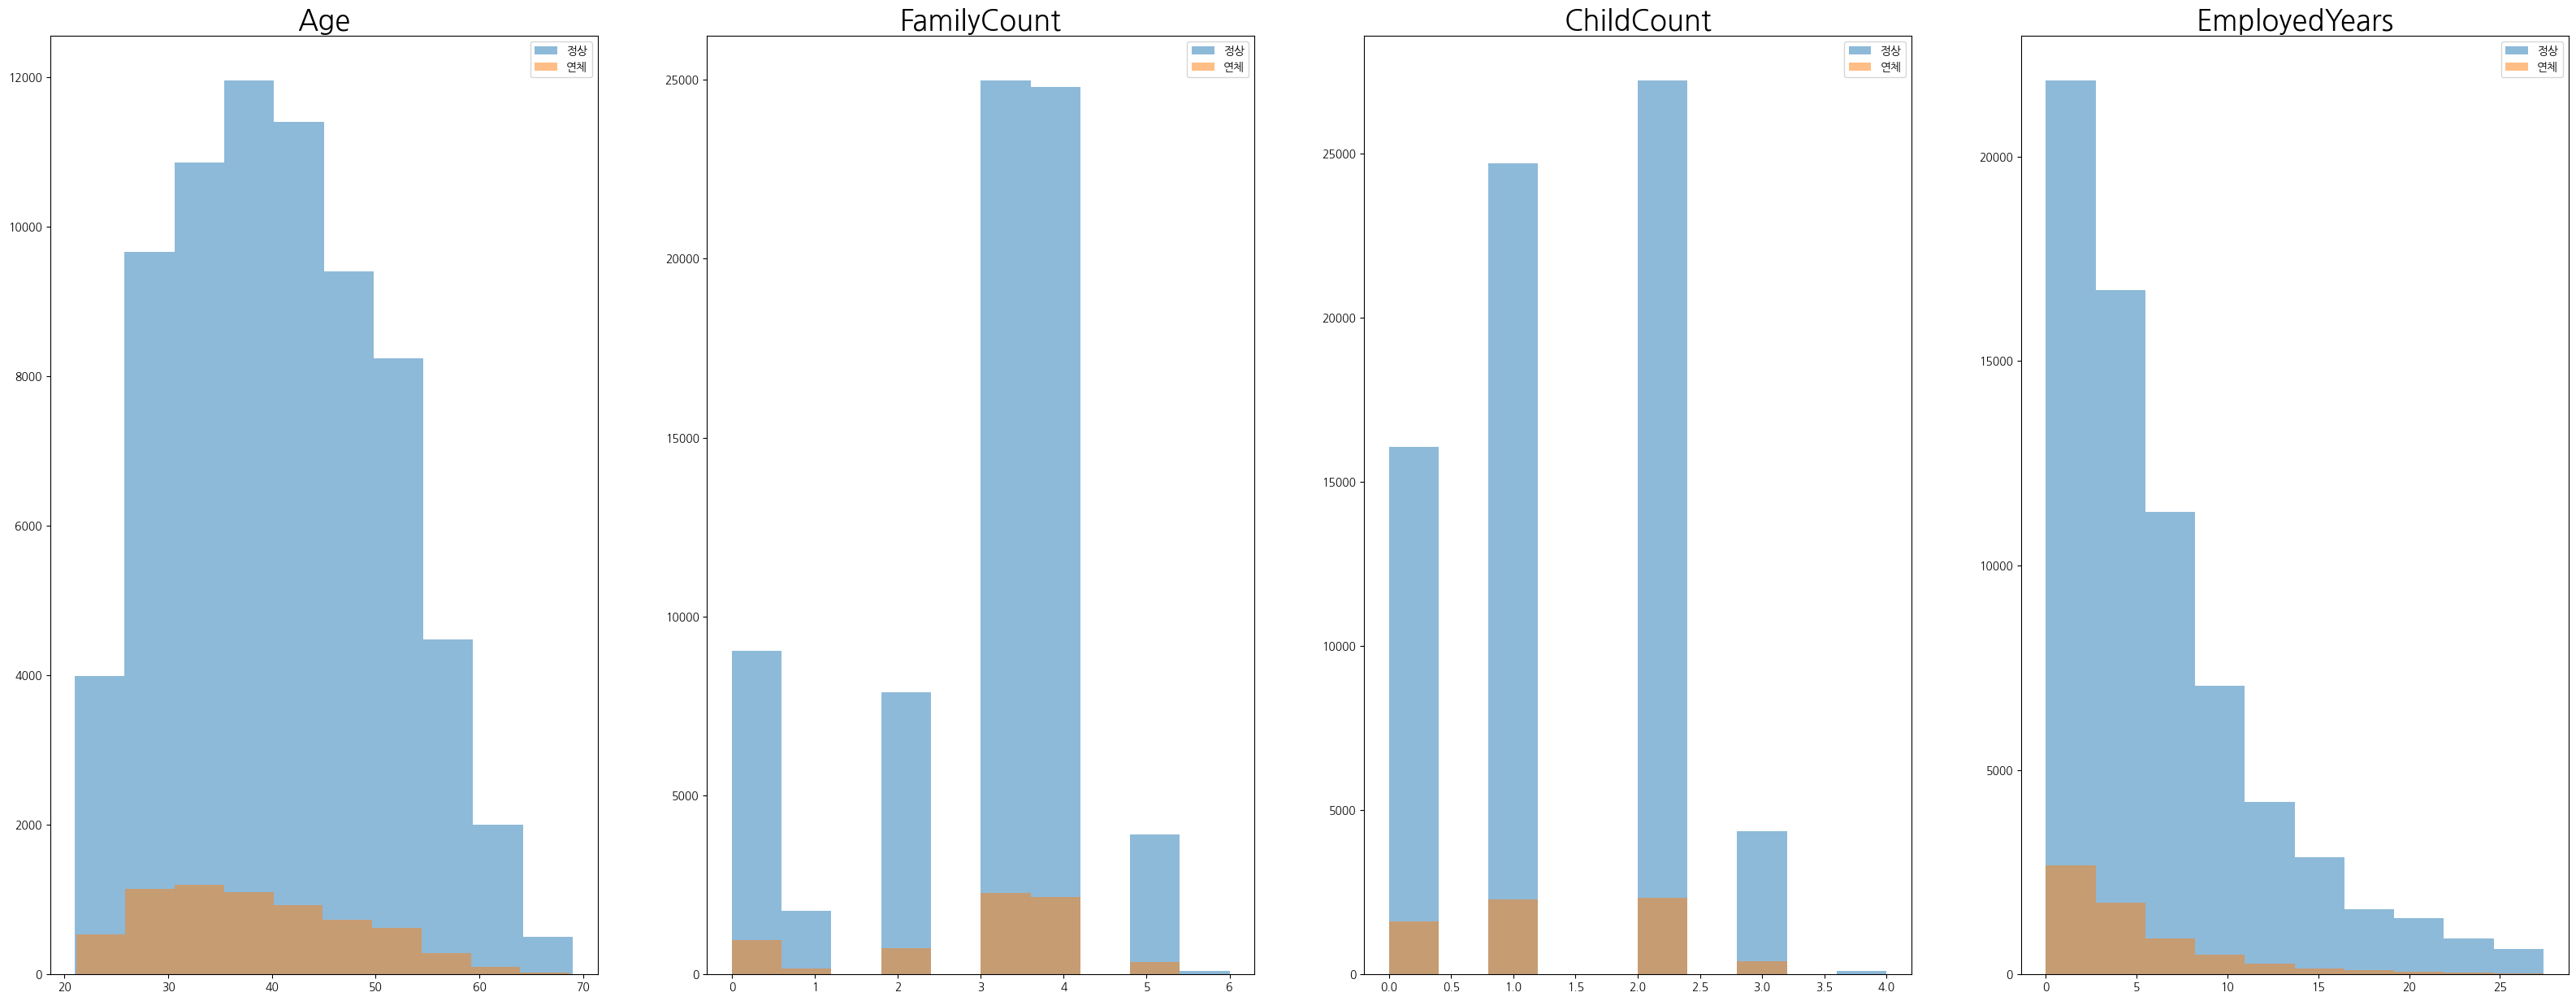

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
plt.hist(df[df['Default'] == 0]['Age'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['Age'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('Age', fontsize = 25)

plt.subplot(1,4,2)
plt.hist(df[df['Default'] == 0]['FamilyCount'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['FamilyCount'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('FamilyCount', fontsize = 25)

plt.subplot(1,4,3)
plt.hist(df[df['Default'] == 0]['ChildCount'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['ChildCount'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('ChildCount', fontsize = 25)

plt.subplot(1,4,4)
plt.hist(df[df['Default'] == 0]['EmployedYears'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['EmployedYears'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('EmployedYears', fontsize = 25)

plt.show()

[특성파악]

- Age : 30대, 40대의 경우가 대출 비율이 다른 나이대에 비해 높으며 연체율의 경우 50,60대의 경우 30대에 비해 여유 자금이 있을 것으로 판단하여 연체율이 낮고 30대가 높을 것이다.

- FamilyCount : 가족수가 3명,4명일 경우 대출 비율이 높긴하나 연체율이 비율로 보았을 때 비슷한 것으로 생각되어 연체 예측에 영향을 미칠만한 변수는 아닌 것으로 판단됨

- ChildCount : FamilyCount와 동일

- EmployedYears : 근속연수의 경우 연체 비율로 보면 비슷하나 근속연수가 작은 경우 대출을 하는 고객이 많고 그만큼 연체가 생기는 구간이 확연히 차이가 있는 것으로 보아 연체 예측에 있어 중요한 변수인 것으로 판단됨

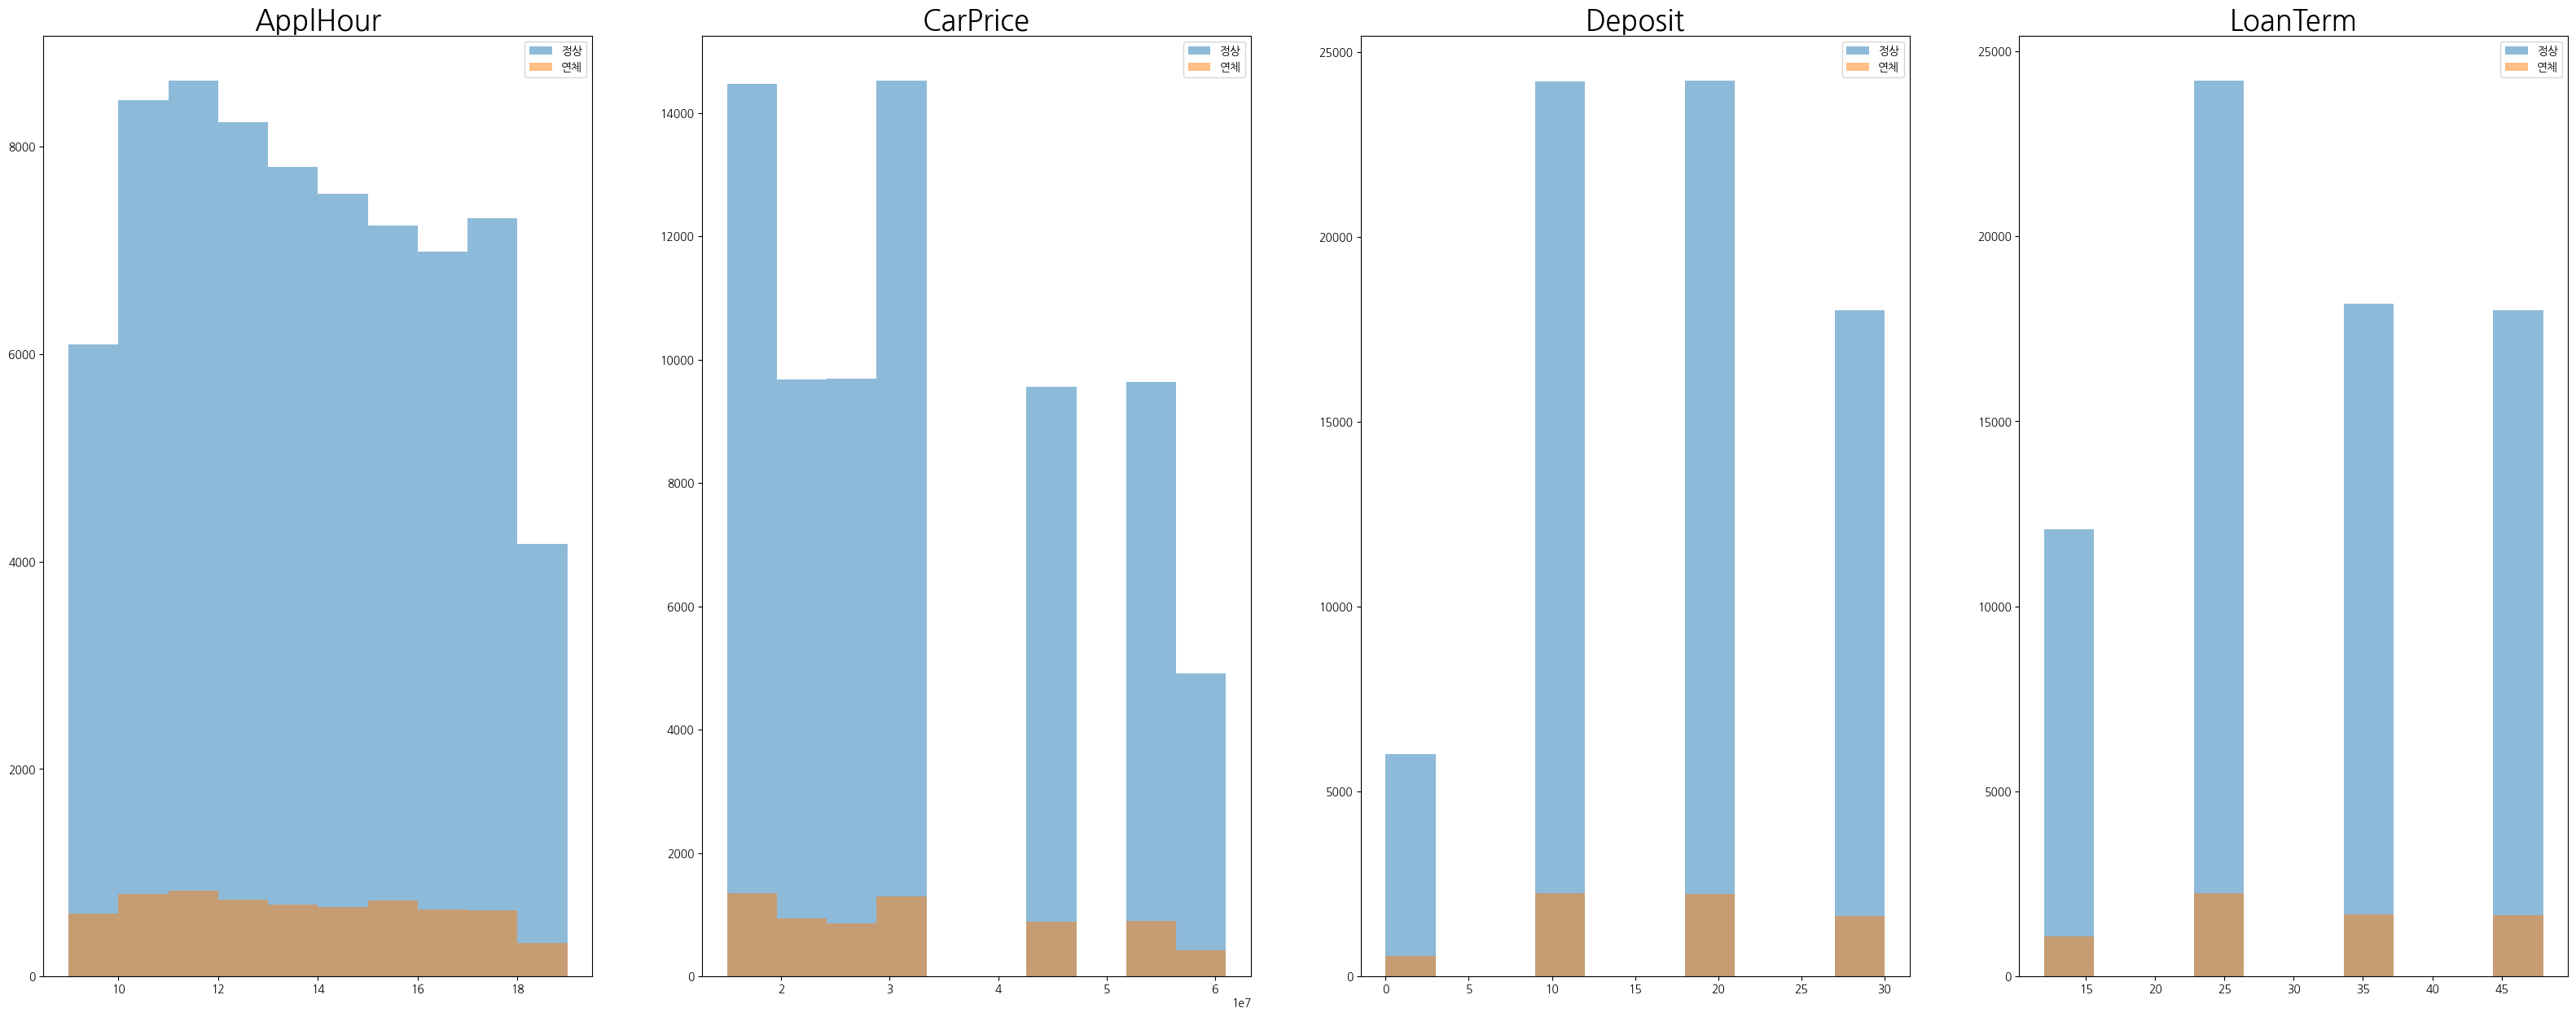

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
plt.hist(df[df['Default'] == 0]['ApplHour'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['ApplHour'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('ApplHour', fontsize = 25)

plt.subplot(1,4,2)
plt.hist(df[df['Default'] == 0]['CarPrice'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['CarPrice'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('CarPrice', fontsize = 25)

plt.subplot(1,4,3)
plt.hist(df[df['Default'] == 0]['Deposit'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['Deposit'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('Deposit', fontsize = 25)

plt.subplot(1,4,4)
plt.hist(df[df['Default'] == 0]['LoanTerm'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['LoanTerm'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('LoanTerm', fontsize = 25)

plt.show()

[특성 파악]

- ApplHour : 데이터 분포가 골고루 분포되어 있는 것으로 보아 중요하지 않은 것으로 판단

- CarPrice : 대출 연체에 있어 중요하다고 생각되었으나 연체 비율로 보았을 때 상관이 없는 것으로 판단

- Deposit : 현금 비율이 0, 10, 20, 30% 의 경우 모두 연체 비율이 비슷하기에 영향이 없는 변수로 판단

- LoanTerm : 대출 기간 또한 현금비율과 동일

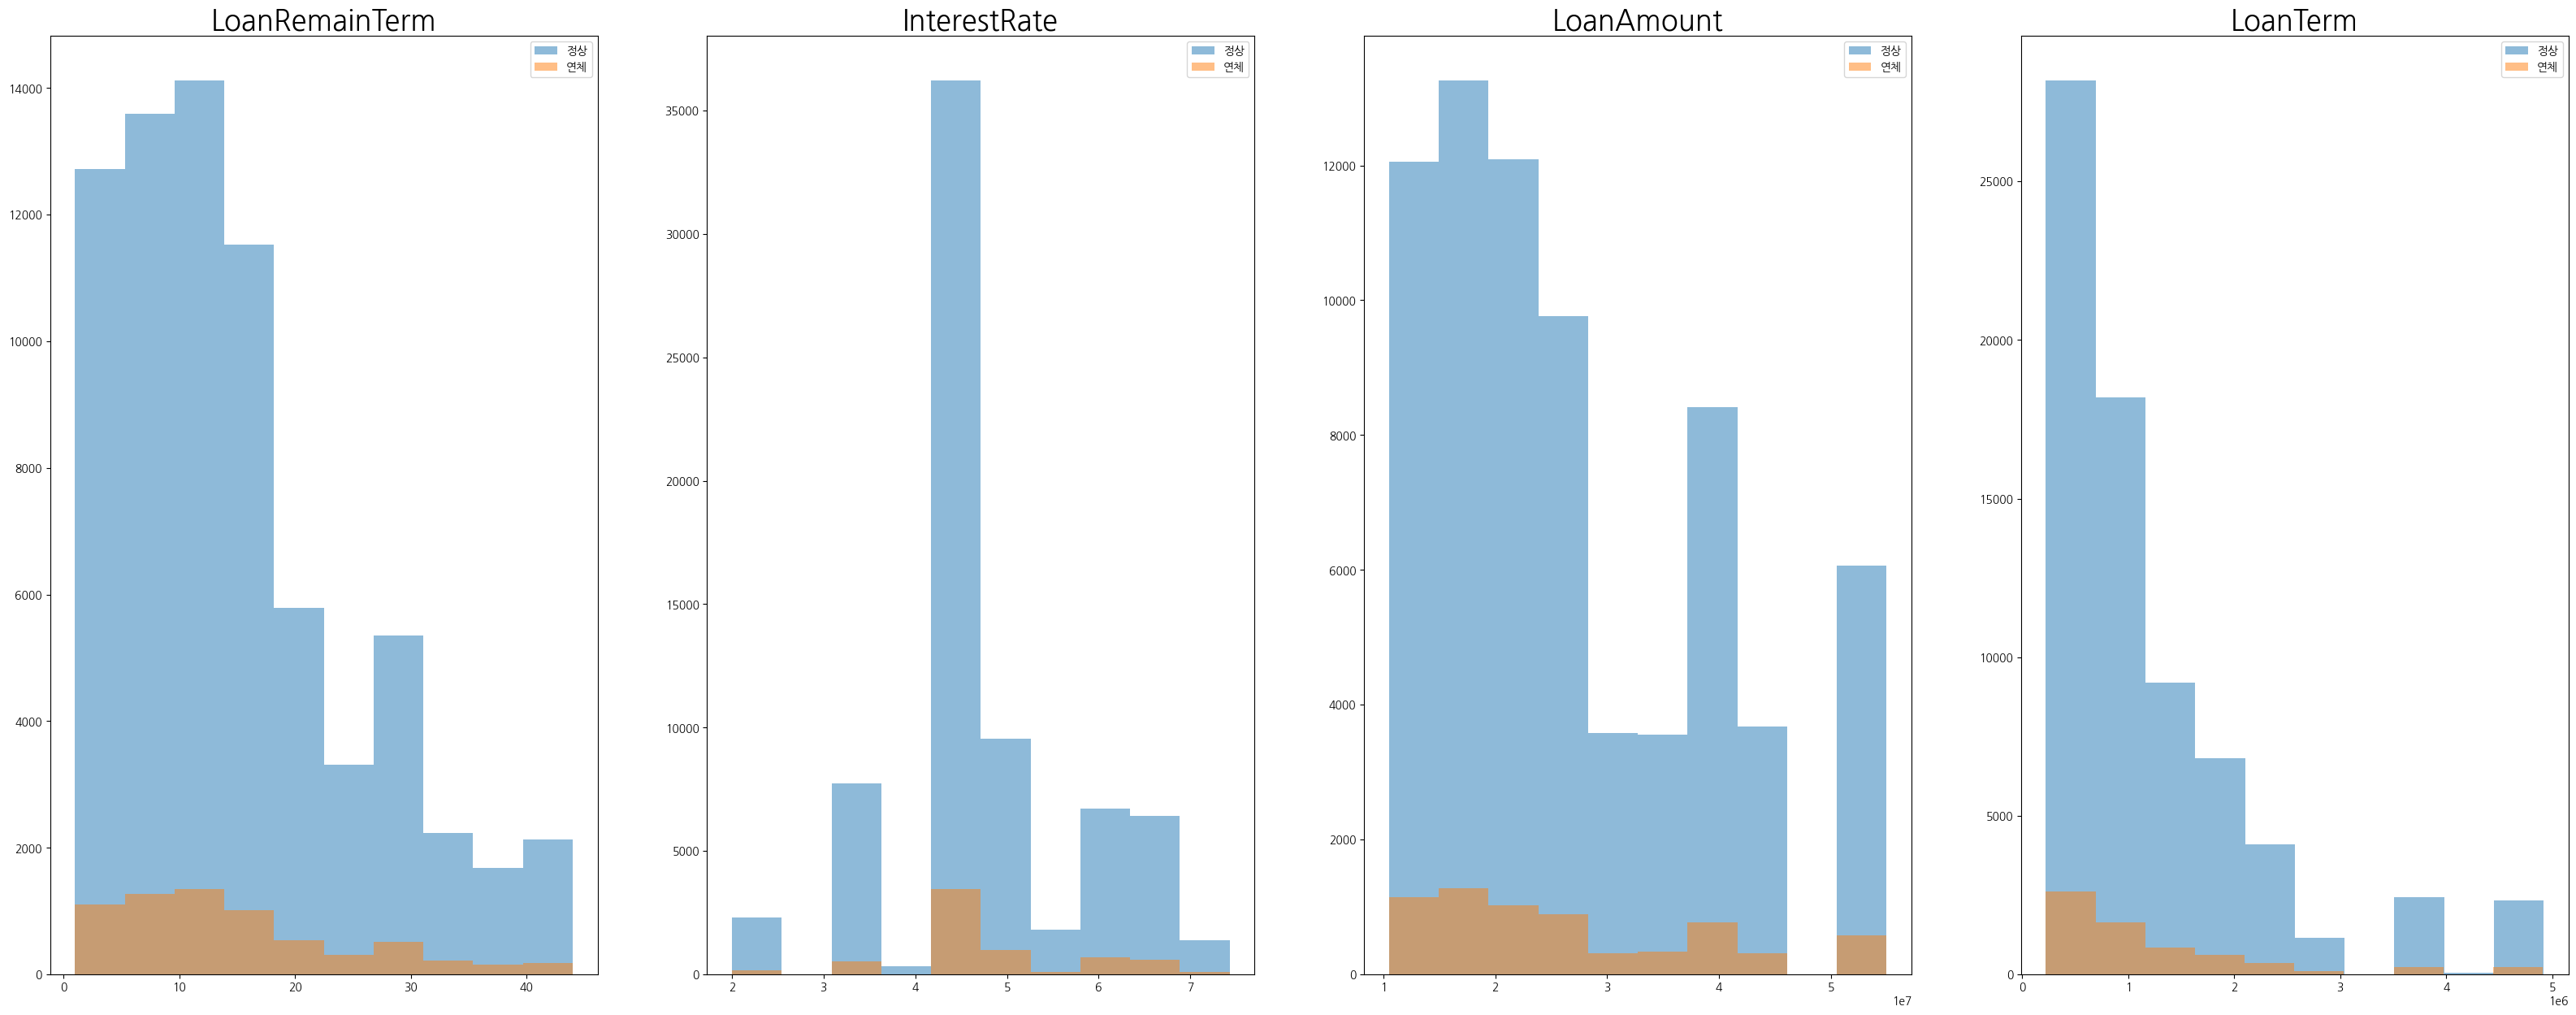

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
plt.hist(df[df['Default'] == 0]['LoanRemainTerm'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['LoanRemainTerm'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('LoanRemainTerm', fontsize = 25)

plt.subplot(1,4,2)
plt.hist(df[df['Default'] == 0]['InterestRate'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['InterestRate'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('InterestRate', fontsize = 25)

plt.subplot(1,4,3)
plt.hist(df[df['Default'] == 0]['LoanAmount'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['LoanAmount'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('LoanAmount', fontsize = 25)

plt.subplot(1,4,4)
plt.hist(df[df['Default'] == 0]['InstallAmount'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['InstallAmount'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('InstallAmount', fontsize = 25)

plt.show()

[특성 파악]

- LoanRemainTerm : 대출 잔여 기간의 경우 잔여기간이 적게 남은 경우 고객이 많고 연체 고객이 많은 것으로 어느정도 영향이 있을 것으로 판단

- InterestRate : 금리의 경우 그래프의 유의미한 결과는 없으나 연체율에 대해 큰 영향을 미칠 것으로 판단하여 예측에 꼭 필요한 변수로 판단됨

- LoanAmount : 대출금이 높은 경우 연체율이 많을 것으로 예상했으나 적은 대출금을 빌려 연체가 되는 고객이 많은 것으로 보임

- InstallAmount : 연체비율은 비슷하나 월납입액이 낮은 경우가 고객비율이 많음으로 월납입액을 적게 내는 고객의 경우 집중적으로 볼 필요가 있는 것으로 판단됨

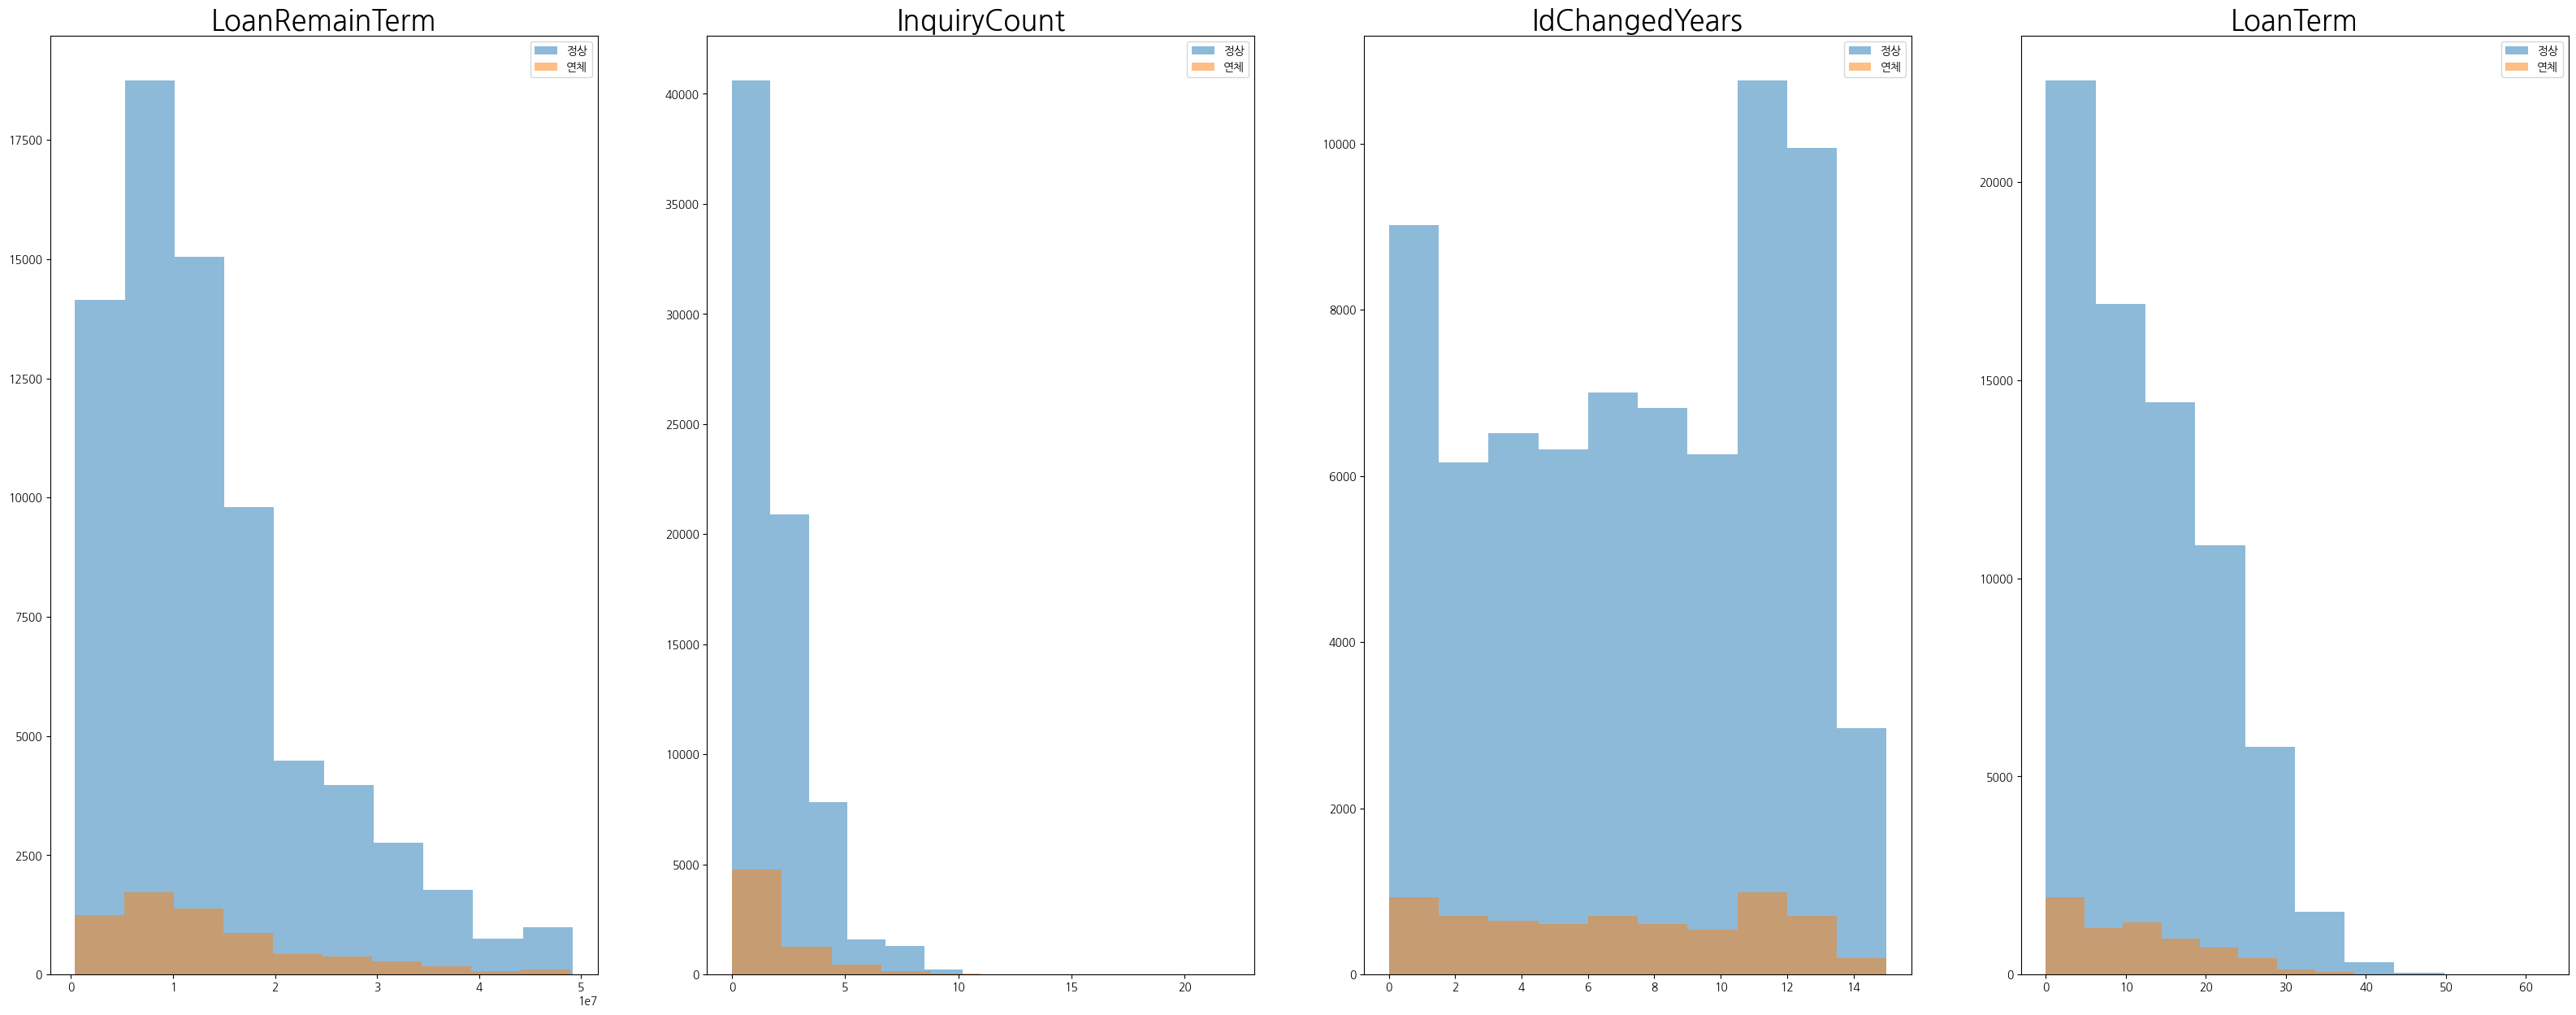

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
plt.hist(df[df['Default'] == 0]['LoanRemainAmount'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['LoanRemainAmount'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('LoanRemainAmount', fontsize = 25)

plt.subplot(1,4,2)
plt.hist(df[df['Default'] == 0]['InquiryCount'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['InquiryCount'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('InquiryCount', fontsize = 25)

plt.subplot(1,4,3)
plt.hist(df[df['Default'] == 0]['IdChangedYears'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['IdChangedYears'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('IdChangedYears', fontsize = 25)

plt.subplot(1,4,4)
plt.hist(df[df['Default'] == 0]['InfoChangedYears'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['InfoChangedYears'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('InfoChangedYears', fontsize = 25)

plt.show()

[특성 파악]

- LoanRemainAmount : 연체 비율이 비슷하긴 하나 대출잔액이 적게 남은 고객의 비율이 많기 때문에 대출잔액이 적은 고객 위주로 집중적인 관리가 필요한 것으로 판단됨

- InquiryCount : 전년도 대출 문의건수의 경우 문의건수가 적은 경우 연체 고객이 많은 것으로 연체 예측에 어느정도 영향이 있을 것으로 판단됨

- IdChangedYears : 데이터 분포가 골고루 퍼져있으며 연체 비율 또한 비슷한 것으로 보아 영향이 거의 없을 것으로 판단됨

- InfoChangedYears : 개인 정보를 자주 바꾸는 고객의 경우 연체 고객이 많은 것으로 연체 예측에 영향을 줄 것으로 판단됨

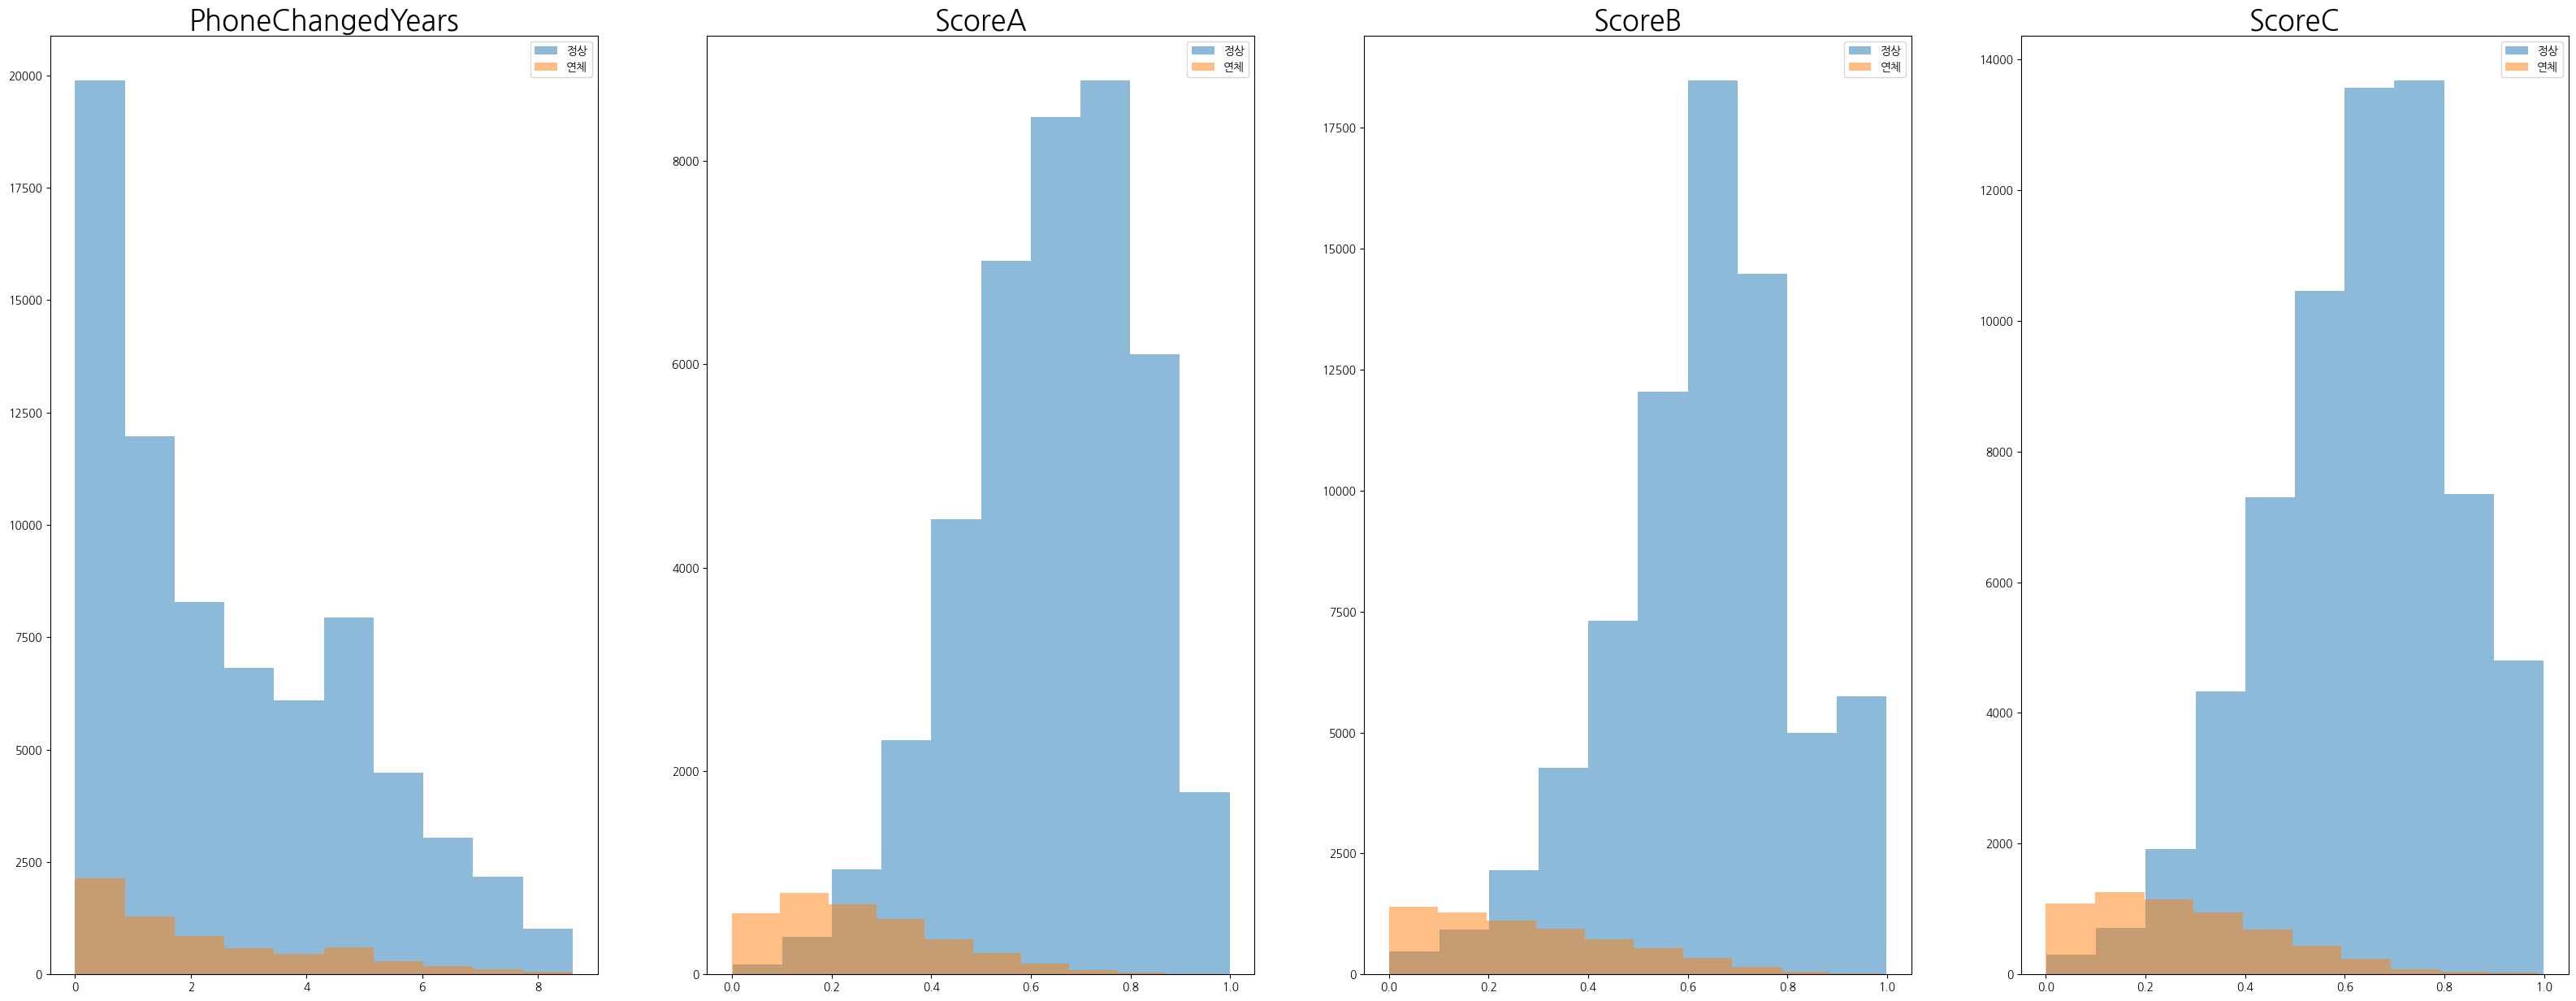

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
plt.hist(df[df['Default'] == 0]['PhoneChangedYears'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['PhoneChangedYears'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('PhoneChangedYears', fontsize = 25)

plt.subplot(1,4,2)
plt.hist(df[df['Default'] == 0]['ScoreA'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['ScoreA'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('ScoreA', fontsize = 25)

plt.subplot(1,4,3)
plt.hist(df[df['Default'] == 0]['ScoreB'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['ScoreB'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('ScoreB', fontsize = 25)

plt.subplot(1,4,4)
plt.hist(df[df['Default'] == 0]['ScoreC'] , label = '정상', alpha = 0.5)
plt.hist(df[df['Default'] == 1]['ScoreC'], label = '연체', alpha = 0.5)
plt.legend()
plt.title('ScoreC', fontsize = 25)

plt.show()

[특성 파악]

- PhoneChangedYears : 개인정보 변경 후 경과기간과 동일한 것으로 보임

- Score A,B,C : 연체 예측에 있어서 신용졈수가 실제로 제일 중요한 것으로 알고 있으며 데이터 분포를 보았을 때 신용점수가 낮은 고객의 경우 연체가 정상상환 비율보다 높은 것을 볼 수 있어서 가장 큰 영향을 미칠 요인이라고 판단됨

## 범주형 데이터

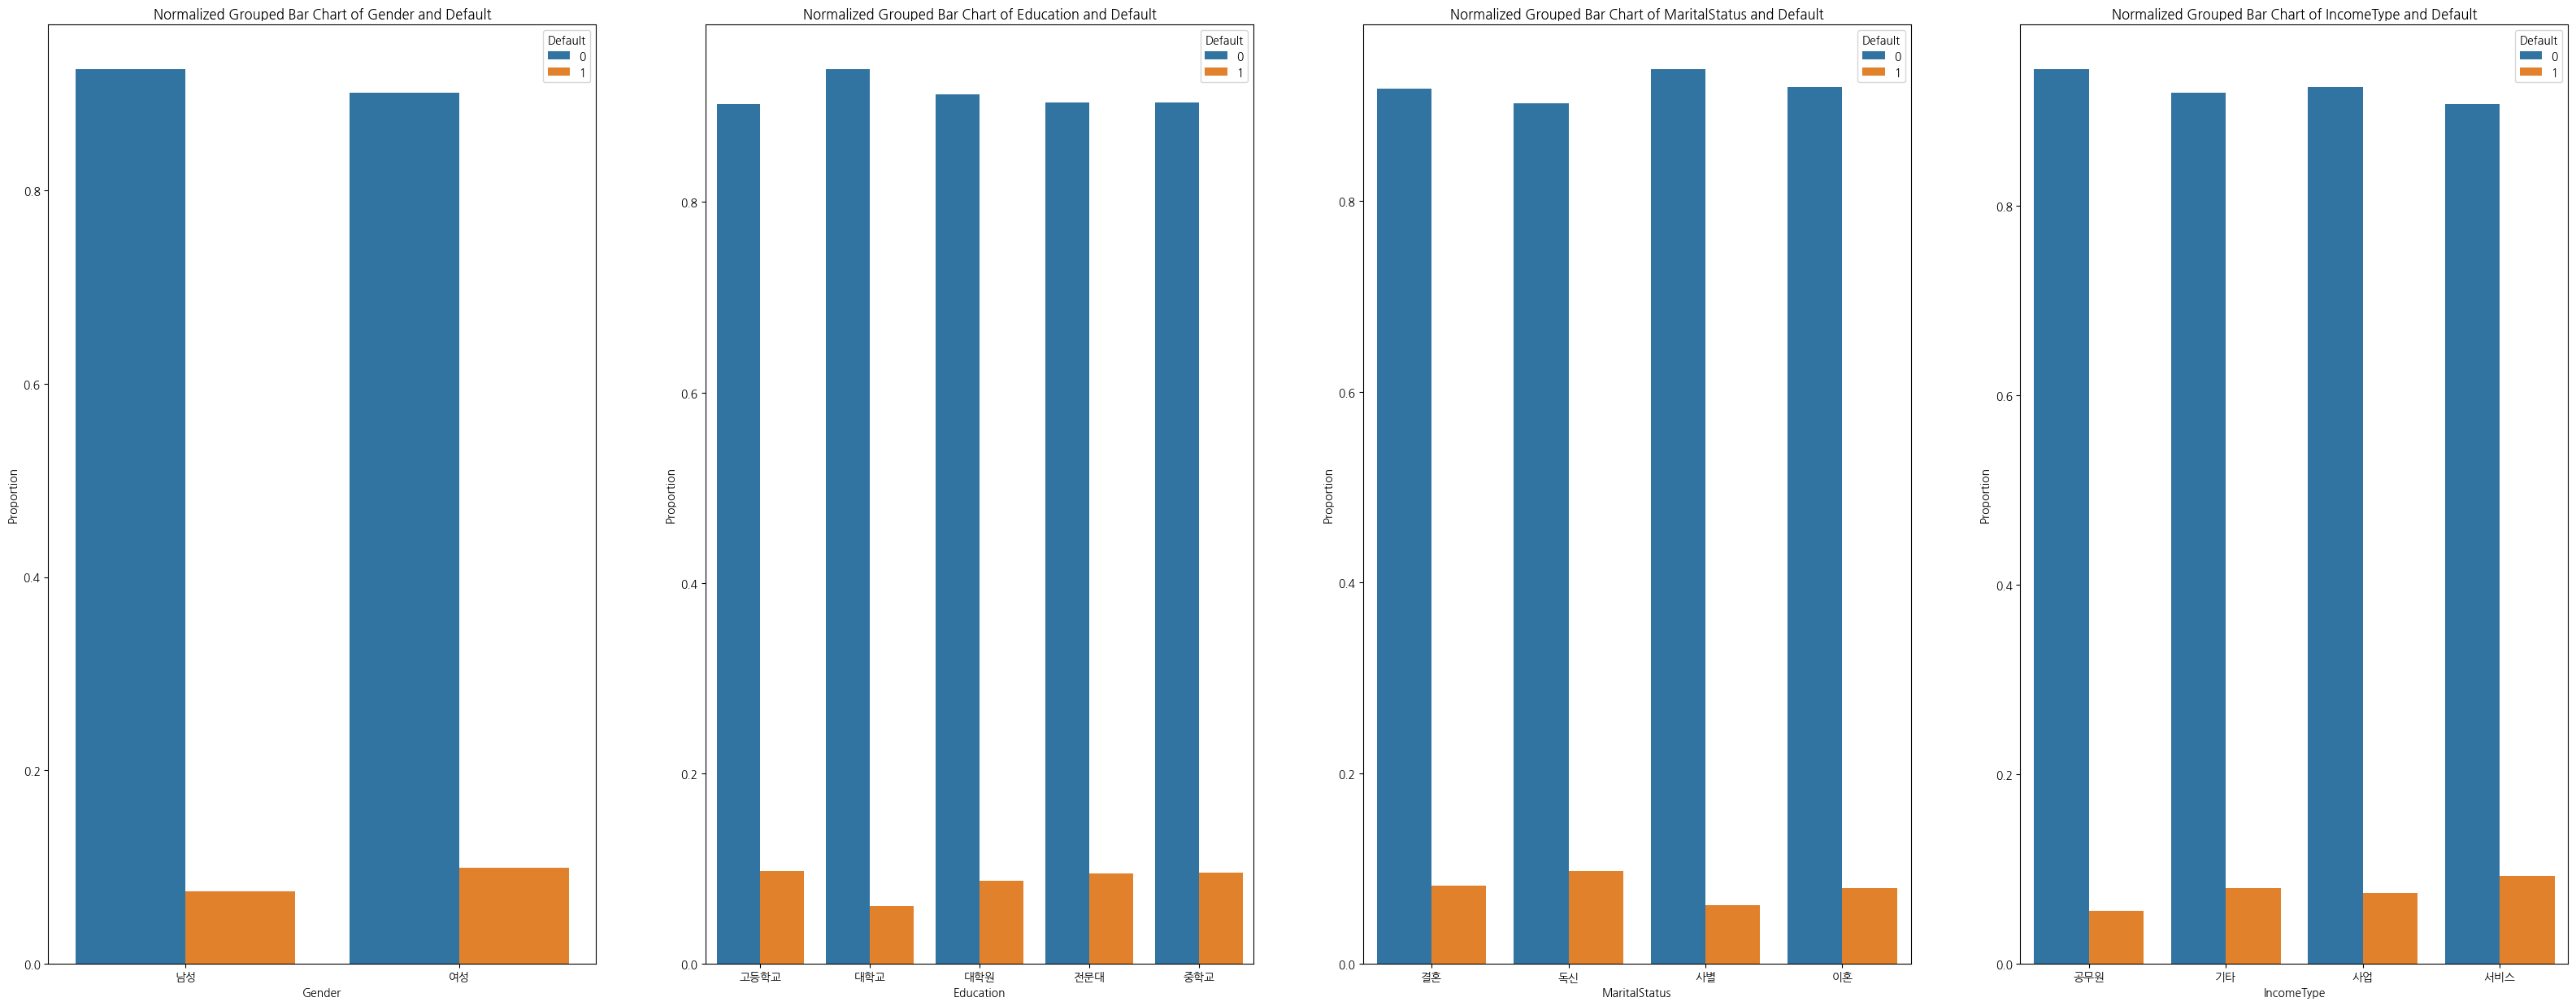

In [ ]:
plt.figure(figsize = (40,15))

plt.subplot(1,4,1)
# 데이터 정규화
normalized_counts = df.groupby(['Gender', 'Default']).size() / df.groupby('Gender').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='Gender', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of Gender and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,2)
# 데이터 정규화
normalized_counts = df.groupby(['Education', 'Default']).size() / df.groupby('Education').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='Education', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of Education and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,3)
# 데이터 정규화
normalized_counts = df.groupby(['MaritalStatus', 'Default']).size() / df.groupby('MaritalStatus').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='MaritalStatus', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of MaritalStatus and Default')
plt.ylabel('Proportion')

plt.subplot(1,4,4)
# 데이터 정규화
normalized_counts = df.groupby(['IncomeType', 'Default']).size() / df.groupby('IncomeType').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='IncomeType', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of IncomeType and Default')
plt.ylabel('Proportion')

plt.show()

[특성 파악]

- Gender : 남성, 여성의 연체율이 유의미한 차이가 있는 것은 아니지만 여성의 경우가 연체 고객이 더 많은 것으로 보임

- Education : 학력의 경우 높은 경우와 낮은 경우 모두 연체가 비슷하며 대출을 잘 갚는 고객이 많은 것으로 영향이 있는 변수는 아닌 것으로 판단됨

- MaritalStatus : 독신인 경우 연체율이 가장 높으나 유의미한 차이를 보이는 것은 아닌 것으로 연체 예측에 영향이 거의 없을 것으로 보임

- IncomeType : 서비스직종의 경우 연체율이 높은 것으로 보아 안정적인 수입이 아니기에 연체율이 높을 수도 있을 것이라고 생각됨 실제로 공무원인 경우 안정적인 직장이기에 연체율이 가장 낮은 것을 보여주고 있음

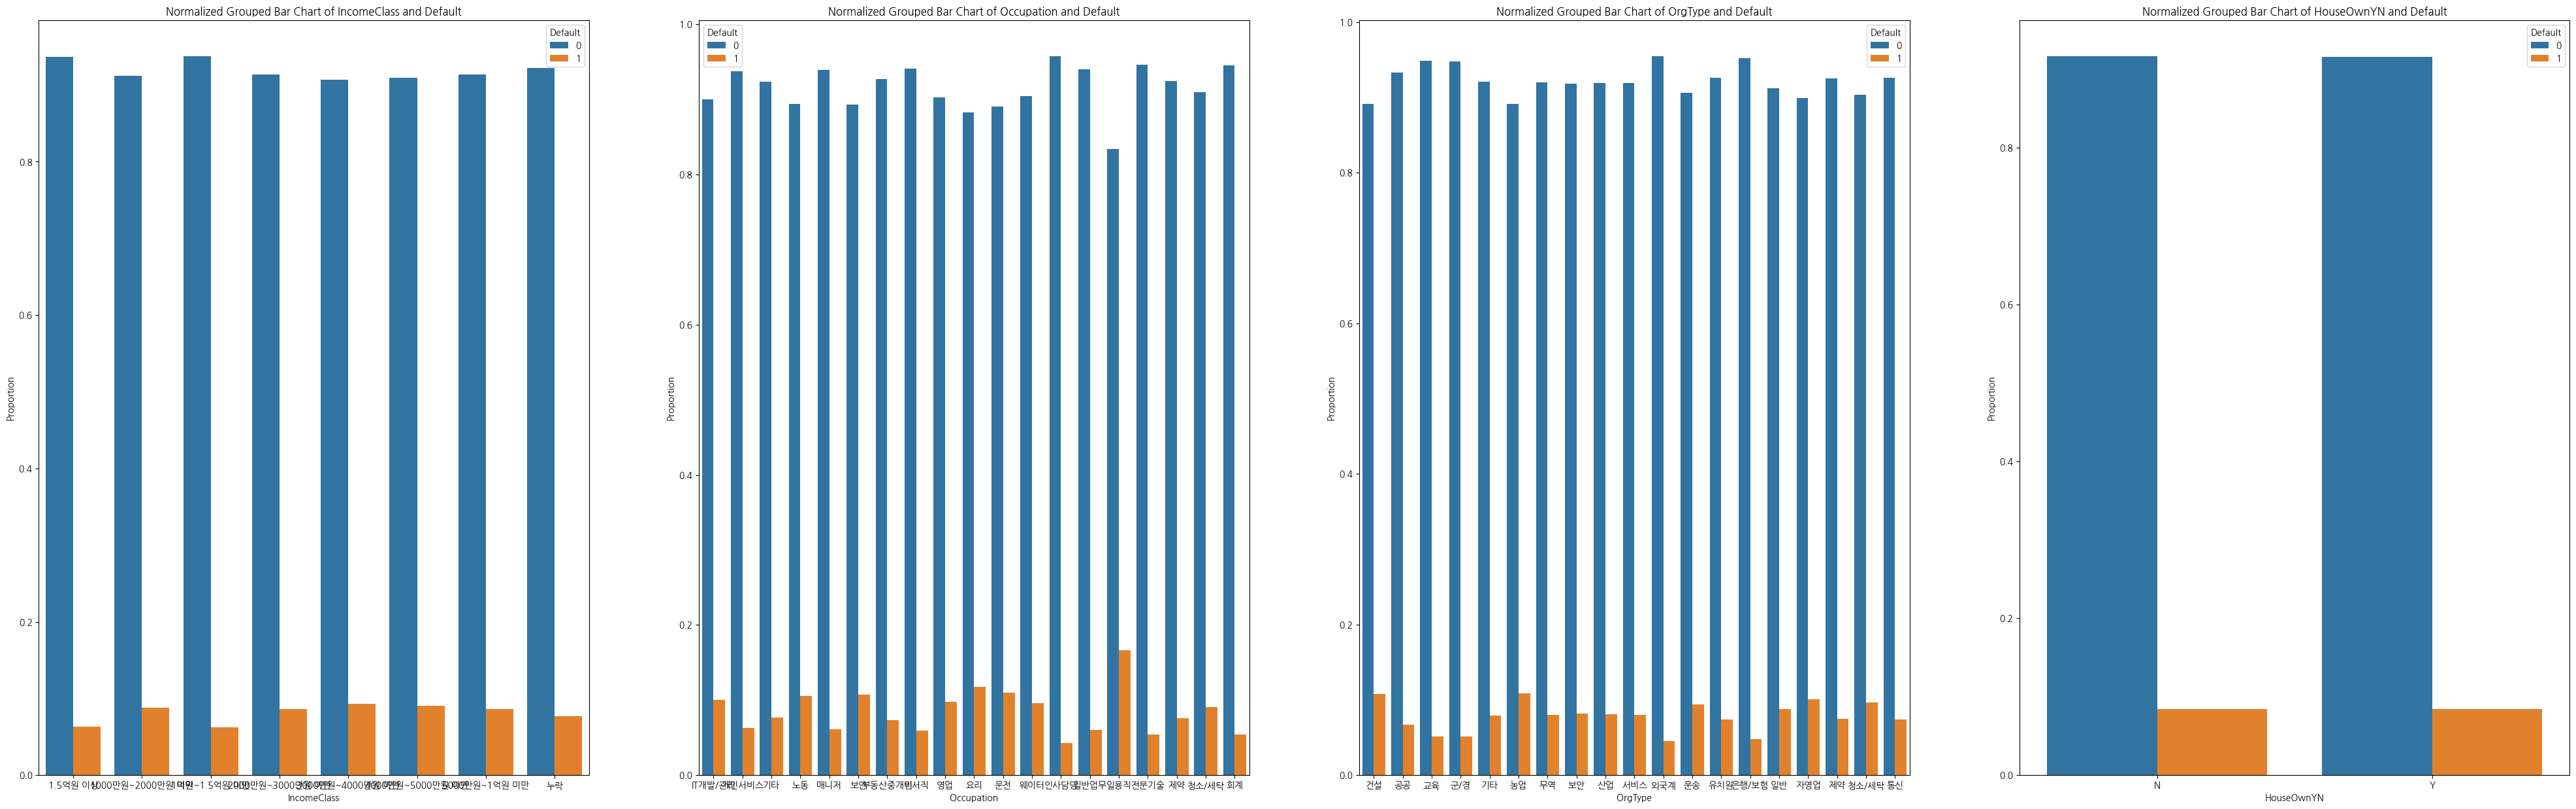

In [ ]:
plt.figure(figsize = (50,15))

plt.subplot(1,4,1)
# 데이터 정규화
normalized_counts = df.groupby(['IncomeClass', 'Default']).size() / df.groupby('IncomeClass').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='IncomeClass', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of IncomeClass and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,2)
# 데이터 정규화
normalized_counts = df.groupby(['Occupation', 'Default']).size() / df.groupby('Occupation').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='Occupation', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of Occupation and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,3)
# 데이터 정규화
normalized_counts = df.groupby(['OrgType', 'Default']).size() / df.groupby('OrgType').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='OrgType', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of OrgType and Default')
plt.ylabel('Proportion')

plt.subplot(1,4,4)
# 데이터 정규화
normalized_counts = df.groupby(['HouseOwnYN', 'Default']).size() / df.groupby('HouseOwnYN').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='HouseOwnYN', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of HouseOwnYN and Default')
plt.ylabel('Proportion')

plt.show()

[특성 파악]

- IncomeClass : 수입이 1억5천이 넘는 고객의 경우 실제 연체율이 1억5천 이하인 고객에 비해 많이 낮은 것으로 보아 수입 등급에 따라 연체율과 연관이 있을 것으로 판단됨

- OrgType : 건설, 농업, 자영업 등 다른 직업에 비해 안정적이지 않은 직업의 경우 연체된 고객이 많은 것을 보이고 안정적인 수입이 있는 직업군의 경우 연체율이 많이 낮은 것을 볼 수 있음

- HouseOwnYN : 주택을 소유한 고객이나 소유하지 않은 고객 모두 연체율이 같은 것으로 보아 예측에 영향이 거의 없을 것으로 판단됨

Text(0, 0.5, 'Proportion')

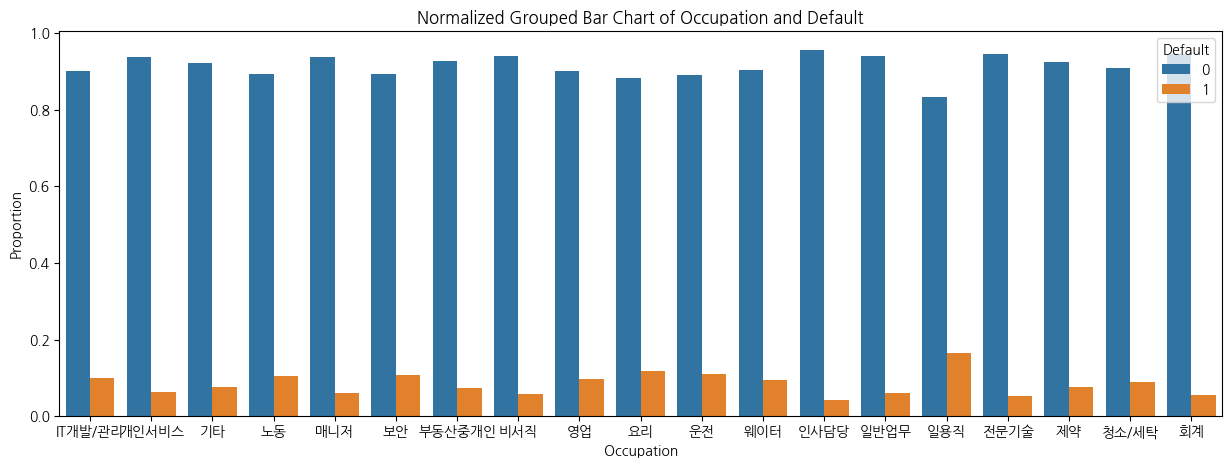

In [ ]:
plt.figure(figsize = (15,5))
# 데이터 정규화
normalized_counts = df.groupby(['Occupation', 'Default']).size() / df.groupby('Occupation').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='Occupation', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of Occupation and Default')
plt.ylabel('Proportion')

[특성 파악]

- Occupation : 모든 직업군 중에서 일용직이 눈에 띄게 연체율이 높은 것으로 보아 일용직인 고객에 경우 연체 확률이 높기에 집중적인 관리가 필요할 것으로 판단됨

- 목표변수 Default (범주형)

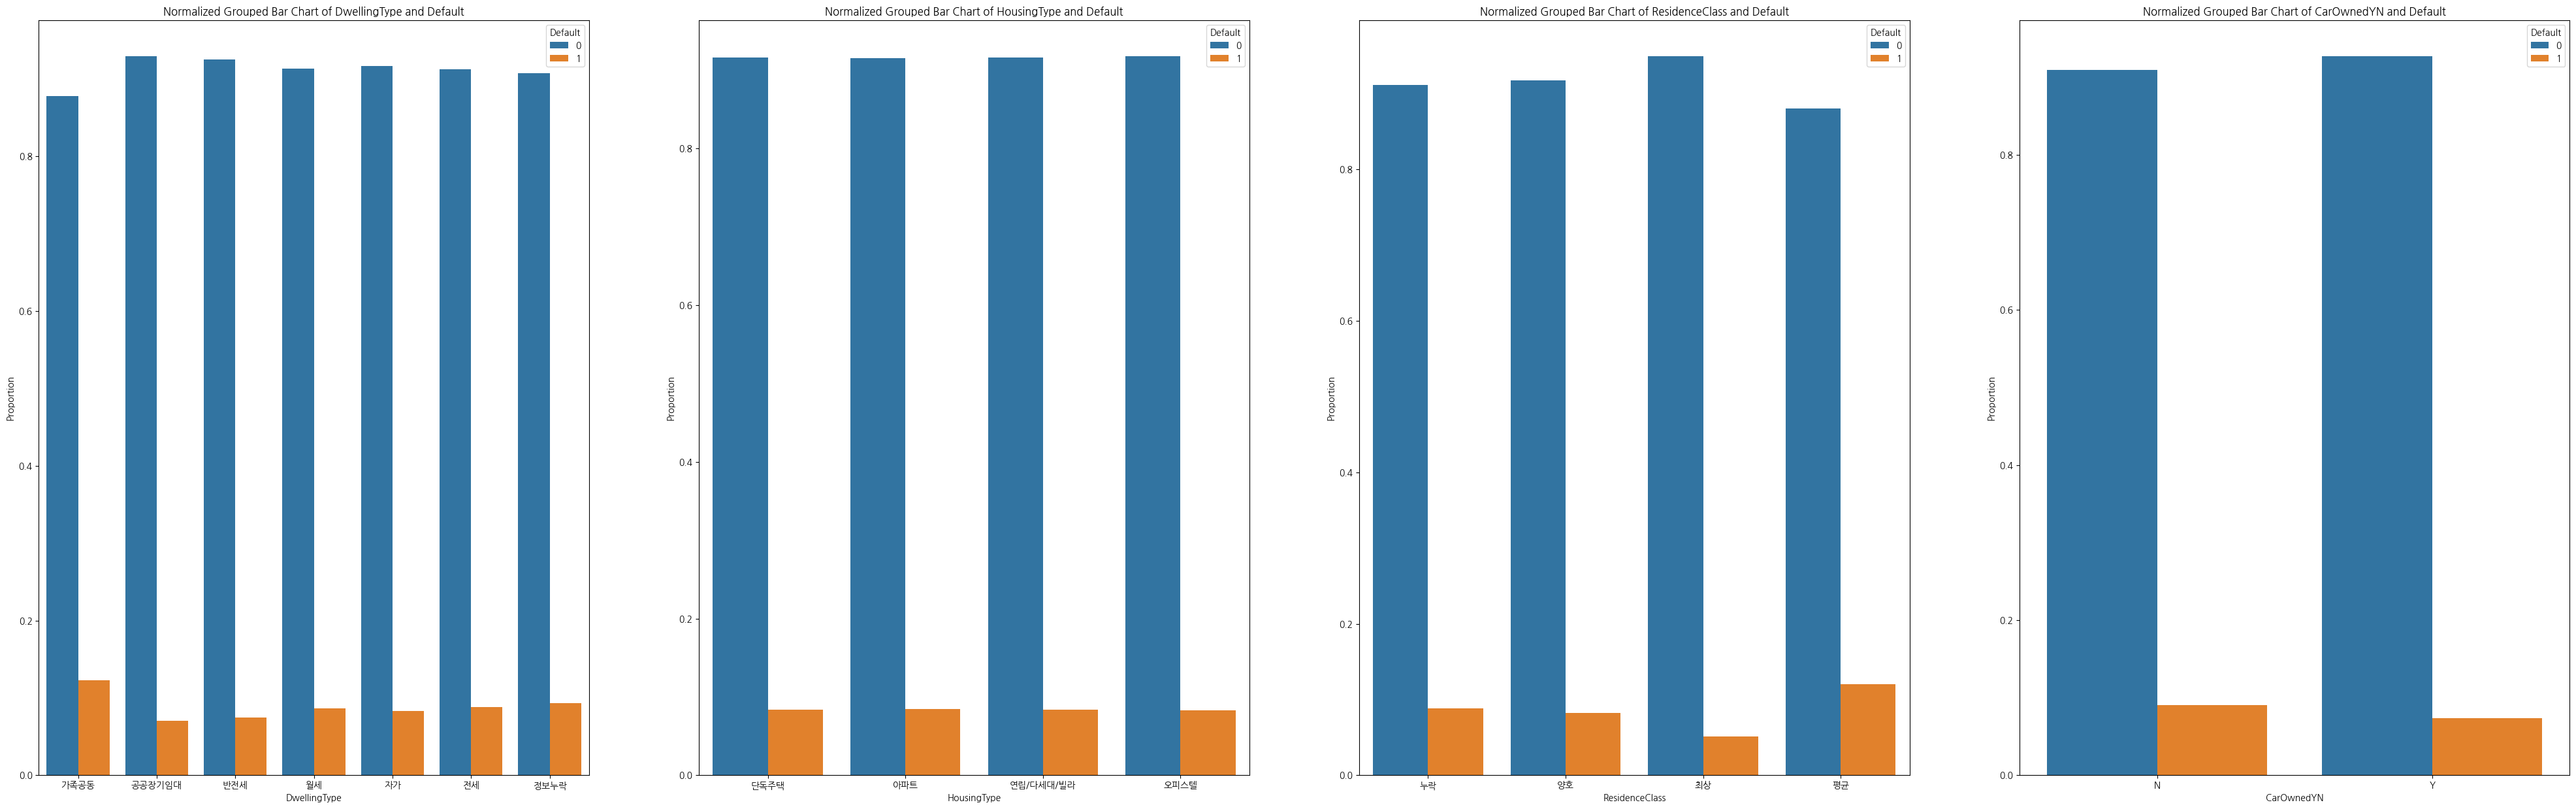

In [ ]:
plt.figure(figsize = (50,15))

plt.subplot(1,4,1)
# 데이터 정규화
normalized_counts = df.groupby(['DwellingType', 'Default']).size() / df.groupby('DwellingType').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='DwellingType', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of DwellingType and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,2)
# 데이터 정규화
normalized_counts = df.groupby(['HousingType', 'Default']).size() / df.groupby('HousingType').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='HousingType', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of HousingType and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,3)
# 데이터 정규화
normalized_counts = df.groupby(['ResidenceClass', 'Default']).size() / df.groupby('ResidenceClass').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='ResidenceClass', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of ResidenceClass and Default')
plt.ylabel('Proportion')

plt.subplot(1,4,4)
# 데이터 정규화
normalized_counts = df.groupby(['CarOwnedYN', 'Default']).size() / df.groupby('CarOwnedYN').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='CarOwnedYN', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of CarOwnedYN and Default')
plt.ylabel('Proportion')

plt.show()

[특성 파악]

- DwellingType : 주거 형태의 경우 가족 공동인 경우 연체율이 다른 형태에 비해 높은 것으로 보여 가족공동에 분류되는 고객에 대해 연체에 대비해야할 것으로 판단됨

- HousingType : 그래프 분포를 보았을 때 변수 자체의 영향이 거의 없을 것으로 판단됨

- ResidenceClass :  양호, 최상, 평균 중 가장 등급이 낮은 평균의 경우가 연체율이 높은 것으로 나타나 연체 예측에 영향이 있을 것으로 판단됨

- CarOwnedYN : 대출 이전 차를 소유하고 하지 않고의 연체율 차이는 거의 없는 것으로 보임

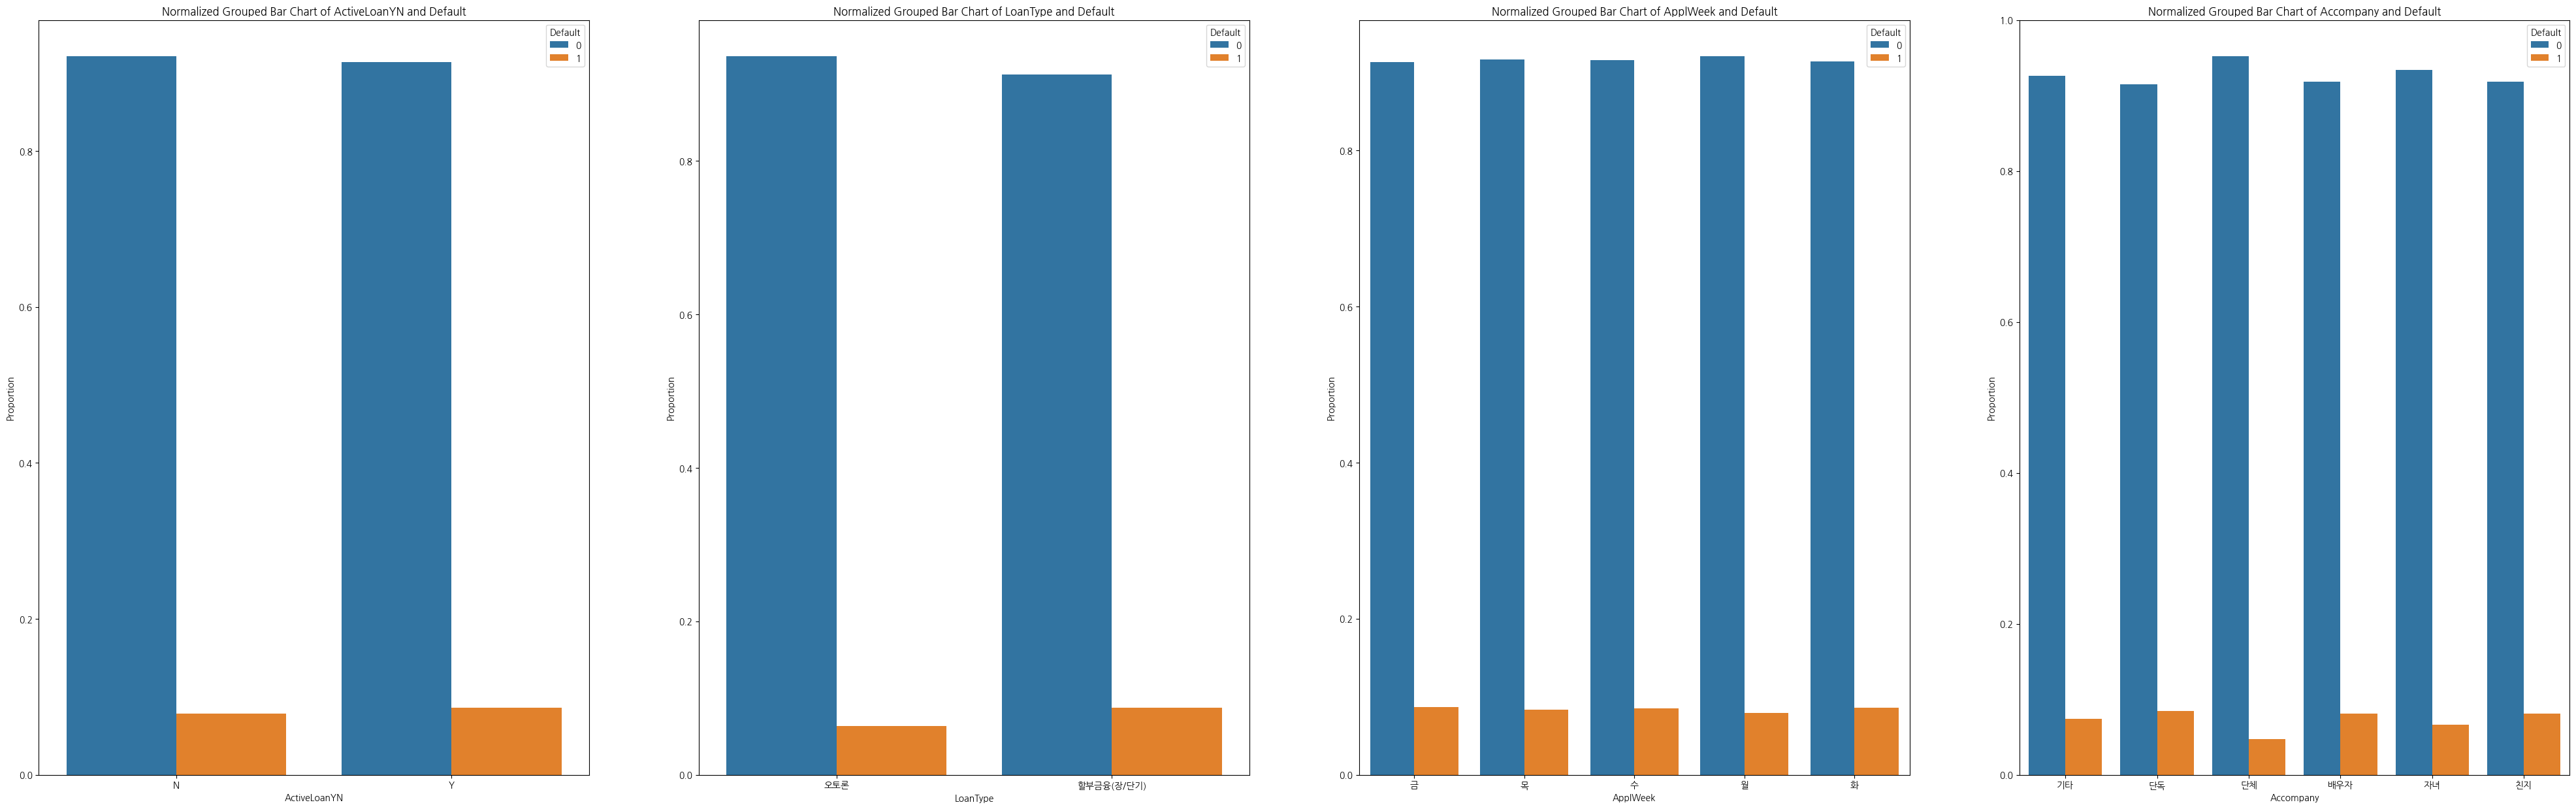

In [ ]:
plt.figure(figsize = (50,15))

plt.subplot(1,4,1)
# 데이터 정규화
normalized_counts = df.groupby(['ActiveLoanYN', 'Default']).size() / df.groupby('ActiveLoanYN').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='ActiveLoanYN', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of ActiveLoanYN and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,2)
# 데이터 정규화
normalized_counts = df.groupby(['LoanType', 'Default']).size() / df.groupby('LoanType').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='LoanType', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of LoanType and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,3)
# 데이터 정규화
normalized_counts = df.groupby(['ApplWeek', 'Default']).size() / df.groupby('ApplWeek').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='ApplWeek', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of ApplWeek and Default')
plt.ylabel('Proportion')

plt.subplot(1,4,4)
# 데이터 정규화
normalized_counts = df.groupby(['Accompany', 'Default']).size() / df.groupby('Accompany').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='Accompany', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of Accompany and Default')
plt.ylabel('Proportion')

plt.show()

[특성 파악]

- ActiveLoanYN : 신청 당시 활성 대출인 고객과 아닌 고객의 연체율의 차이가 없는 것으로 영향이 없을 것으로 판단

- LoanType : 오토론에 비해 할부금융의 경우가 고객 비율이 높고 연체 비율 또한 할부 금융이 더 높은 것으로 오토론 보단 할부금융이 연체 확률이 올라갈 가능성이 있는 것으로 판단됨

- ApplWeek : 비율그래프를 보았을 때 대출은 요일과 연관이 없는 것으로 변수가 연체 예측에 영향을 줄 수 없는 변수인 것으로 판단

- Accompany : 대출 신청시 동행자가 있고 없고의 연체율 차이는 없는 것으로 판단되어 영향이 거의 없을 것으로 보임

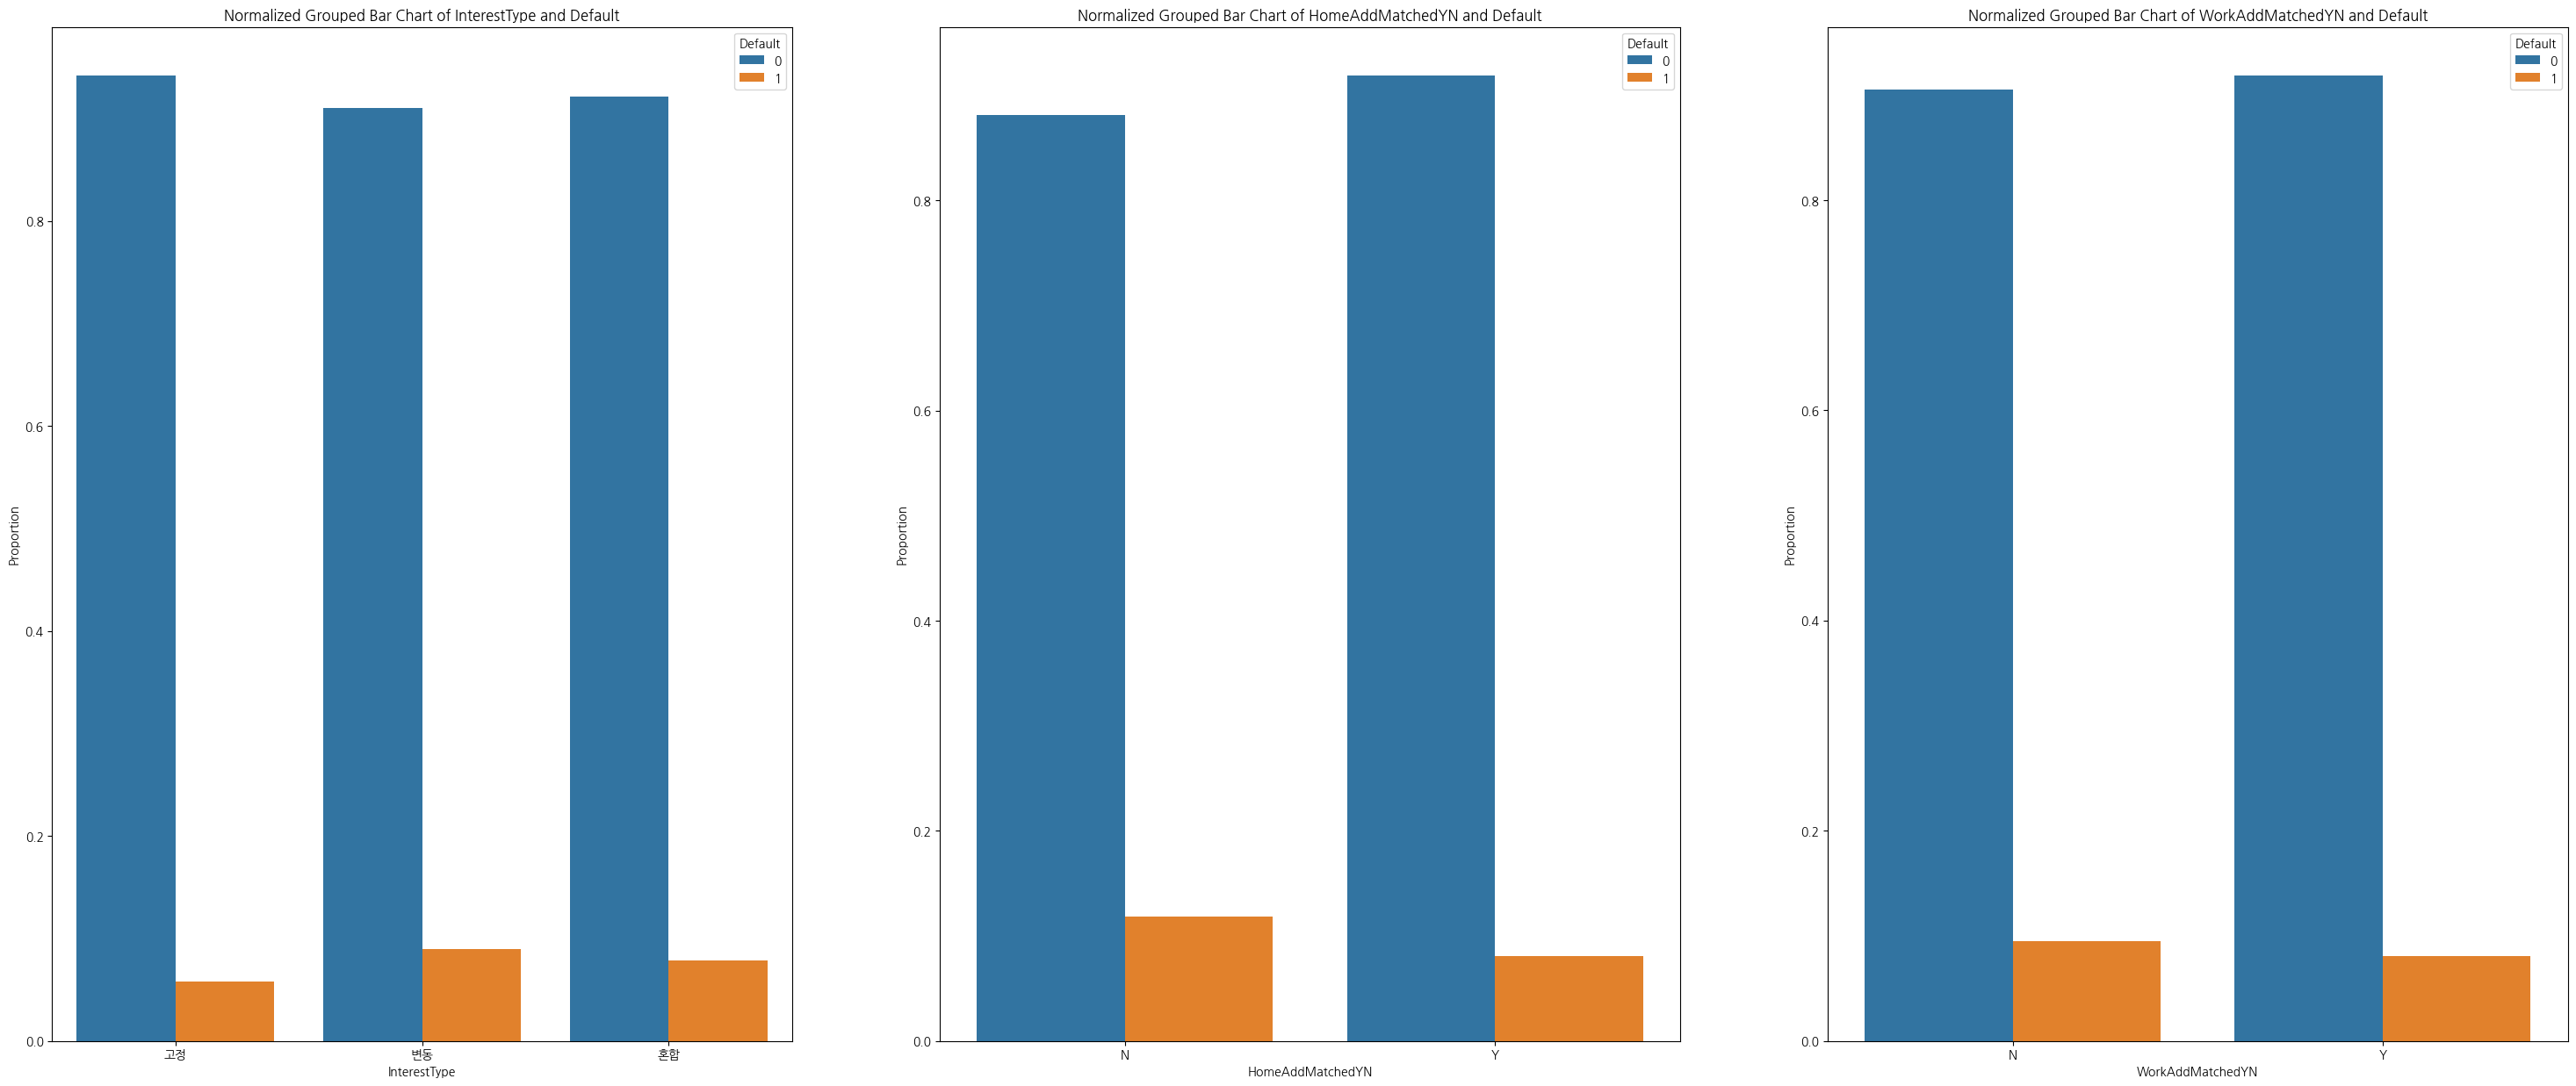

In [ ]:
plt.figure(figsize = (50,15))

plt.subplot(1,4,1)
# 데이터 정규화
normalized_counts = df.groupby(['InterestType', 'Default']).size() / df.groupby('InterestType').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='InterestType', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of InterestType and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,2)
# 데이터 정규화
normalized_counts = df.groupby(['HomeAddMatchedYN', 'Default']).size() / df.groupby('HomeAddMatchedYN').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='HomeAddMatchedYN', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of HomeAddMatchedYN and Default')
plt.ylabel('Proportion')


plt.subplot(1,4,3)
# 데이터 정규화
normalized_counts = df.groupby(['WorkAddMatchedYN', 'Default']).size() / df.groupby('WorkAddMatchedYN').size()

# 정규화된 데이터로 그룹별 막대 그래프 생성

sns.barplot(x='WorkAddMatchedYN', y=normalized_counts.values, hue='Default', data=normalized_counts.reset_index())
plt.title('Normalized Grouped Bar Chart of WorkAddMatchedYN and Default')
plt.ylabel('Proportion')

plt.show()

[특성 파악]

- InterestType : 금리가 고정 금리인 경우가 연체율이 낮고 변동 금리의 경우가 가장 연체율이 큰 것으로 보아 연체형태에 따라 연체에 영향을 줄 것으로 판단됨

- HomeAddMatchedYN : 집 주소가 일치하는 경우 안정적인 직장을 가진다는 뜻이므로 안정적인 수입을 통해 연체가 되지 않을 확률이 크기 때문에 이 변수 또한 연체에 영향을 크게 줄 것으로 판단됨

- WorkAddMatchedYN : 일자리 주소 일치 또한 집주소 일치여부와 비슷하나 그렇게 유의미한 차이가 있는 것으로 보이진 않음

# 기존 고객(train) 연체 분류 모델

## 통계적 가설 검정 (Default)

- 범주형이 라벨 인코딩된 변수는 연속형이 아님

연속형 vs. 연속형:

    t-검정 (독립표본 T-검정 또는 대응표본 T-검정): 두 연속형 변수 간의 평균 차이를 검정합니다. 독립표본 T-검정은 두 독립된 그룹 간의 평균 차이를, 대응표본 T-검정은 동일한 그룹 내에서의 전/후 차이를 검정합니다.

    상관 분석 (Pearson 또는 Spearman): 두 연속형 변수 간의 선형 또는 비선형 상관 관계를 검정합니다.

범주형 vs. 범주형:

    카이제곱 검정 (Chi-square Test): 두 범주형 변수 간의 독립성을 검정합니다. 주로 분할표(Contingency Table)를 사용하여 카이제곱 통계량을 계산합니다.

    Fisher의 정확한 검정 (Fisher's Exact Test): 작은 샘플 크기 또는 특정 가정이 충족되지 않는 경우에 사용되는 범주형 변수의 독립성 검정 방법 중 하나입니다.

연속형 vs. 범주형:

    분산분석 (ANOVA): 범주형 변수의 수준 간에 종속 변수의 평균 차이를 검정합니다. 일원배치(One-way ANOVA) 또는 이원배치(Two-way ANOVA) 등이 사용됩니다.

    로지스틱 회귀 분석 (Logistic Regression): 종속 변수가 이항 분포를 따르는 경우, 범주형 변수와 연속형 변수 간의 관계를 모델링하는 데 사용됩니다.

    비모수 검정 (Mann-Whitney U 검정 또는 크루스칼-왈리스 검정): 변수가 정규분포를 따르지 않거나 순위 형태인 경우에 사용되는 비모수 검정 방법입니다.

연속형 x & 범주형 Y:
  
    로지스틱 회귀분석

범주형x & 연속형 Y:

    비모수적 검정 (kruskal-wallis)

### (Default)범주형 - 범주형

- 연체 여부인 범주형 목표변수에 따라 범주형 설명변수들의 관련성이 있는지 판단 하는 카이제곱 검정을 통해 유의 수준을 0.05로 잡고 검정을 실시함

In [ ]:
# 가설검정 및 통계 분석 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols

In [ ]:
cross_tab1 = pd.crosstab(df['Default'], df['Gender'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "Gender chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

cross_tab1 = pd.crosstab(df['Default'], df['Education'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "Education chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
cross_tab1 = pd.crosstab(df['Default'], df['MaritalStatus'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "MaritalStatus chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
cross_tab1 = pd.crosstab(df['Default'], df['IncomeType'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "IncomeType chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
cross_tab1 = pd.crosstab(df['Default'], df['IncomeClass'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "IncomeClass chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
cross_tab1 = pd.crosstab(df['Default'], df['Occupation'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "Occupation chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
cross_tab1 = pd.crosstab(df['Default'], df['OrgType'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "OrgType chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

cross_tab1 = pd.crosstab(df['Default'], df['HouseOwnYN'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "HouseOwnYN chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
cross_tab1 = pd.crosstab(df['Default'], df['DwellingType'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "DwellingType chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
cross_tab1 = pd.crosstab(df['Default'], df['HousingType'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "HousingType chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
cross_tab1 = pd.crosstab(df['Default'], df['ResidenceClass'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "ResidenceClass chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
cross_tab1 = pd.crosstab(df['Default'], df['CarOwnedYN'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "CarOwnedYN chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

cross_tab1 = pd.crosstab(df['Default'], df['ActiveLoanYN'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "ActiveLoanYN chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

cross_tab1 = pd.crosstab(df['Default'], df['LoanType'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "LoanType chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

cross_tab1 = pd.crosstab(df['Default'], df['ApplWeek'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "ApplWeek chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

cross_tab1 = pd.crosstab(df['Default'], df['Accompany'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "Accompany chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

cross_tab1 = pd.crosstab(df['Default'], df['InterestType'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "InterestType chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

cross_tab1 = pd.crosstab(df['Default'], df['HomeAddMatchedYN'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "HomeAddMatchedYN chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

cross_tab1 = pd.crosstab(df['Default'], df['WorkAddMatchedYN'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "WorkAddMatchedYN chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

Gender chi-square test 
 chisq: 135.13
 p-value : 0.000
 degree of freedom: 1

Education chi-square test 
 chisq: 289.54
 p-value : 0.000
 degree of freedom: 4

MaritalStatus chi-square test 
 chisq: 48.01
 p-value : 0.000
 degree of freedom: 3

IncomeType chi-square test 
 chisq: 141.39
 p-value : 0.000
 degree of freedom: 3

IncomeClass chi-square test 
 chisq: 84.74
 p-value : 0.000
 degree of freedom: 7

Occupation chi-square test 
 chisq: 438.26
 p-value : 0.000
 degree of freedom: 18

OrgType chi-square test 
 chisq: 190.49
 p-value : 0.000
 degree of freedom: 18

HouseOwnYN chi-square test 
 chisq: 0.01
 p-value : 0.908
 degree of freedom: 1

DwellingType chi-square test 
 chisq: 46.64
 p-value : 0.000
 degree of freedom: 6

HousingType chi-square test 
 chisq: 0.70
 p-value : 0.874
 degree of freedom: 3

ResidenceClass chi-square test 
 chisq: 312.90
 p-value : 0.000
 degree of freedom: 3

CarOwnedYN chi-square test 
 chisq: 71.74
 p-value : 0.000
 degree of freedom: 1

ActiveL

- 변수 배제 : ApplWeek,HousingType,HouseOwnYN
- 유의하지 않은 변수 3가지가 나왔으나 무조건으로 배제하기 보단 도메인을 통해 변수가 연체 여부에 대해 영향을 미칠지 판단하여 제거할 계획

### (Default)범주형 - 연속형 (로지스틱 회귀분석)

- 목표변수가 범주형이기에 로지스틱 분석을 통하여 유의 수준을 0.05로 하여 각 변수의 유의성을 판단하여 유의한 변수를 선택하기 위한 분석

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df_num = df.select_dtypes(exclude = "object")
df_num.columns

Index(['Age', 'FamilyCount', 'ChildCount', 'EmployedYears', 'Default',
       'ApplHour', 'CarPrice', 'Deposit', 'LoanTerm', 'LoanRemainTerm',
       'InterestRate', 'LoanAmount', 'InstallAmount', 'LoanRemainAmount',
       'InquiryCount', 'IdChangedYears', 'InfoChangedYears',
       'PhoneChangedYears', 'ScoreA', 'ScoreB', 'ScoreC'],
      dtype='object')

In [ ]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""Default ~ Age + EmployedYears + ApplHour +
                      InterestRate + InquiryCount + IdChangedYears + InfoChangedYears + PhoneChangedYears""", df)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.288262
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                73445
Model:                          Logit   Df Residuals:                    73436
Method:                           MLE   Df Model:                            8
Date:                Sat, 18 Nov 2023   Pseudo R-squ.:                 0.01751
Time:                        21:54:30   Log-Likelihood:                -21171.
converged:                       True   LL-Null:                       -21549.
Covariance Type:            nonrobust   LLR p-value:                1.146e-157
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4162      0.110    -12.916      0.000      -1.631      -1.201
Age     

- 변수배제 : LoanAmount, LoanRemainAmount, InstallAmount, LoanAmount, LoanRemainTerm, LoanTerm, Deposit, CarPrice, ChildCount, FamilyCount

- 로지스틱 분석을 통한 변수 선택을 실시하였으나 배제된 변수가 많아 도메인을 통하여 필요하다고 판단되는 변수를 더 뽑아 사용할 계획


-  연속형 다중회귀
- 범주형 로지스틱

## Default 예측 분류 모델

### GradientBoosting

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

- 연체 여부에 대한 예측에 신용점수는 큰 영향을 미칠 것임에도 제거를 하고 모델링을 하는 이유는 외부기관의 위탁하여 평가받은 신용점수의 경우 좋은 평가 점수를 받았음에도 연체 비율이 낮지 않은 경우가 있어 신뢰성 문제 때문에 외부기관의 신용평가 점수는 사용하지 않고 연체 예측을 하는 방식을 채택함

In [ ]:
df_gb = df.drop(['ApplWeek','HousingType','HouseOwnYN','LoanAmount', 'LoanRemainAmount', 'InstallAmount', 'LoanAmount', 'LoanRemainTerm', 'LoanTerm', 'Deposit', 'CarPrice', 'ChildCount', 'FamilyCount','ScoreA','ScoreB','ScoreC'],axis = 1)

In [ ]:
df_gb

,Gender,Age,Education,MaritalStatus,IncomeType,IncomeClass,Occupation,OrgType,EmployedYears,DwellingType,...,ApplHour,Accompany,InterestType,InterestRate,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears
0,여성,21.0,대학원,독신,서비스,3000만원~4000만원 미만,일반업무,무역,2.3,자가,...,10,단독,변동,6.10,N,Y,1,1.0,10.3,0.0
1,남성,21.1,대학교,독신,사업,2000만원~3000만원 미만,기타,일반,1.2,자가,...,13,단독,변동,6.83,Y,Y,1,1.0,21.1,0.4
2,여성,21.2,대학교,독신,사업,5000만원~1억원 미만,영업,무역,1.0,월세,...,13,단독,혼합,4.54,N,Y,0,1.1,21.1,1.7
3,남성,21.2,중학교,결혼,사업,3000만원~4000만원 미만,영업,무역,3.1,자가,...,16,단독,고정,6.40,Y,Y,1,1.1,0.0,0.0
4,남성,21.3,고등학교,결혼,서비스,누락,일반업무,무역,1.7,자가,...,14,단독,변동,6.50,Y,Y,2,1.2,21.2,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94204,남성,66.4,중학교,결혼,기타,5000만원~1억원 미만,제약,공공,17.8,자가,...,10,단독,변동,4.43,Y,Y,4,13.1,0.0,2.3
94219,남성,67.2,고등학교,이혼,기타,4000만원~5000만원 미만,기타,무역,NaN,자가,...,18,단독,변동,5.10,Y,Y,1,12.1,6.8,0.0
94222,남성,67.3,전문대,결혼,기타,5000만원~1억원 미만,기타,산업,NaN,자가,...,10,단독,변동,4.30,Y,Y,4,10.8,50.9,1.1
94229,남성,67.8,대학원,사별,사업,5000만원~1억원 미만,전문기술,일반,2.5,자가,...,14,단독,변동,4.39,Y,Y,0,12.1,8.6,4.3


In [ ]:
df_gb = df_gb.dropna()

In [ ]:
df_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73445 entries, 0 to 94240
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             73445 non-null  object 
 1   Age                73445 non-null  float64
 2   Education          73445 non-null  object 
 3   MaritalStatus      73445 non-null  object 
 4   IncomeType         73445 non-null  object 
 5   IncomeClass        73445 non-null  object 
 6   Occupation         73445 non-null  object 
 7   OrgType            73445 non-null  object 
 8   EmployedYears      73445 non-null  float64
 9   DwellingType       73445 non-null  object 
 10  ResidenceClass     73445 non-null  object 
 11  CarOwnedYN         73445 non-null  object 
 12  Default            73445 non-null  int64  
 13  ActiveLoanYN       73445 non-null  object 
 14  LoanType           73445 non-null  object 
 15  ApplHour           73445 non-null  int64  
 16  Accompany          734

In [ ]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_gb)

In [ ]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop(["Default"], axis = 1, inplace = False)
df_raw_y = df_raw_dummy["Default"]

In [ ]:
df_raw_x.columns

Index(['Age', 'EmployedYears', 'ApplHour', 'InterestRate', 'InquiryCount',
       'IdChangedYears', 'InfoChangedYears', 'PhoneChangedYears', 'Gender_남성',
       'Gender_여성', 'Education_고등학교', 'Education_대학교', 'Education_대학원',
       'Education_전문대', 'Education_중학교', 'MaritalStatus_결혼',
       'MaritalStatus_독신', 'MaritalStatus_사별', 'MaritalStatus_이혼',
       'IncomeType_공무원', 'IncomeType_기타', 'IncomeType_사업', 'IncomeType_서비스',
       'IncomeClass_1.5억원 이상', 'IncomeClass_1000만원~2000만원 미만',
       'IncomeClass_1억원~1.5억원 미만', 'IncomeClass_2000만원~3000만원 미만',
       'IncomeClass_3000만원~4000만원 미만', 'IncomeClass_4000만원~5000만원 미만',
       'IncomeClass_5000만원~1억원 미만', 'IncomeClass_누락', 'Occupation_IT개발/관리',
       'Occupation_개인서비스', 'Occupation_기타', 'Occupation_노동', 'Occupation_매니저',
       'Occupation_보안', 'Occupation_부동산중개인', 'Occupation_비서직', 'Occupation_영업',
       'Occupation_요리', 'Occupation_운전', 'Occupation_웨이터', 'Occupation_인사담당',
       'Occupation_일반업무', 'Occupation_일용직', 'Occupation

In [ ]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (73445, 98)
분할 후 설명변수 데이터 :Train (51411, 98)   Test (22034, 98)


- 기본적으로 정확도를 보면 예측이 91%로 낮지 않은 비율을 보여주고 있으나 F1-score를 보았을 때 0인 값을 실제로 0으로 예측할 확률은 95%로 높은 수준을 보여주지만 1인 값을 실제로 1이라고 예측할 확률은 0%로 인 것으로 실제 고객이 연체될 고객임에도 연체 고객으로 판단하지 못하는 경우가 발생하기 때문에 성능이 좋지 못한 모델임을 볼 수 있음

In [ ]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)
y_pred = gb_uncust.predict(df_test_x)
# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.913
Accuracy on test set: 0.915
Test Confusion matrix: 
[[20168     0]
 [ 1866     0]]
              precision    recall  f1-score   support

           0      0.915     1.000     0.956     20168
           1      0.000     0.000     0.000      1866

    accuracy                          0.915     22034
   macro avg      0.458     0.500     0.478     22034
weighted avg      0.838     0.915     0.875     22034



/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_uncust.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3).head(13)

,Feature,Importance
1,EmployedYears,0.148
0,Age,0.101
11,Education_대학교,0.097
78,ResidenceClass_평균,0.077
7,PhoneChangedYears,0.065
5,IdChangedYears,0.040
6,InfoChangedYears,0.037
4,InquiryCount,0.034
77,ResidenceClass_최상,0.029
9,Gender_여성,0.029


Text(0, 0.5, '설명변수')

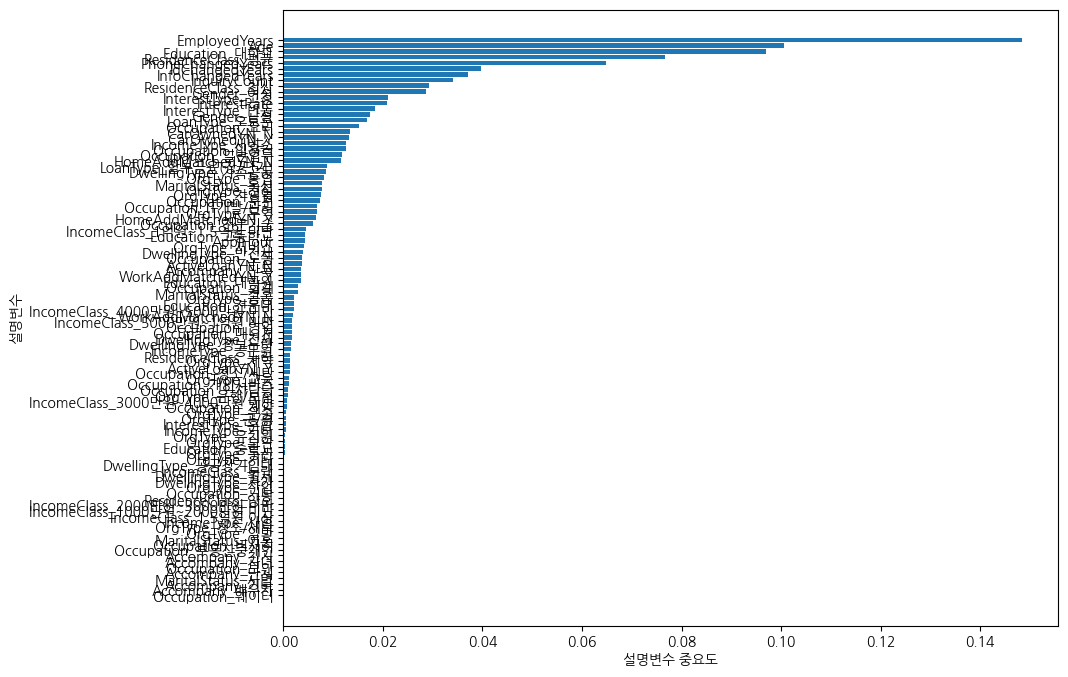

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

- 연체 여부에 따른 예측에 가장 중요하다고 판단한 변수의 중요도를 보여주고 있다
- 근속연수(EmployedYears)의 경우가 가장 영향을 많이 미치는 변수인 것으로 판단됨

### Lightgbm

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df_gb = df.drop(['ApplWeek','HousingType','HouseOwnYN','LoanAmount', 'LoanRemainAmount', 'InstallAmount', 'LoanAmount', 'LoanRemainTerm', 'LoanTerm', 'Deposit', 'CarPrice', 'ChildCount', 'FamilyCount','ScoreA','ScoreB','ScoreC'],axis = 1)

In [ ]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_gb)
df_raw_dummy.head()

,Age,EmployedYears,Default,ApplHour,InterestRate,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,Gender_남성,...,Accompany_배우자,Accompany_자녀,Accompany_친지,InterestType_고정,InterestType_변동,InterestType_혼합,HomeAddMatchedYN_N,HomeAddMatchedYN_Y,WorkAddMatchedYN_N,WorkAddMatchedYN_Y
0,21.0,2.3,0,10,6.10,1,1.0,10.3,0.0,0,...,0,0,0,0,1,0,1,0,0,1
1,21.1,1.2,0,13,6.83,1,1.0,21.1,0.4,1,...,0,0,0,0,1,0,0,1,0,1
2,21.2,1.0,0,13,4.54,0,1.1,21.1,1.7,0,...,0,0,0,0,0,1,1,0,0,1
3,21.2,3.1,0,16,6.40,1,1.1,0.0,0.0,1,...,0,0,0,1,0,0,0,1,0,1
4,21.3,1.7,0,14,6.50,2,1.2,21.2,1.1,1,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("Default", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["Default"]

In [ ]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (79122, 99)
분할 후 설명변수 데이터 :Train (55385, 99)   Test (23737, 99)


In [ ]:
 # LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

# 변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [ ]:
# 기본 모델 지정 및 기본 옵션 확인
lgbm_uncust1 = LGBMClassifier(random_state=1234, max_depth = 6)

lgbm_uncust1.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
# 모델 적합
lgbm_uncust1.fit(df_raw_x, df_raw_y)
print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train
lgbm_pred_train = lgbm_uncust1.predict(df_raw_x)
eval_class_model(df_raw_y, lgbm_pred_train)
print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test
lgbm_pred_test = lgbm_uncust1.predict(df_test_x)
eval_class_model(df_test_y, lgbm_pred_test)

print(classification_report(df_test_y, lgbm_pred_test, digits=3))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6658, number of negative: 72464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 79122, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084149 -> initscore=-2.387271
[LightGBM] [Info] Start training from score -2.387271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

- lightgbm 모델의 경우도 F1-score가 연체 고객에 대해 예측을 못하는 것을 보여주고 있어 예측을 잘 하지 못하는 것으로 판단됨

In [ ]:
df_test_y[:30]

24245    0
63383    0
4504     0
88804    0
61731    0
26720    0
89935    0
54486    0
68337    0
2748     0
18925    0
19026    0
80132    0
70440    0
72698    0
6310     1
87488    0
93385    0
25959    0
68406    0
36570    0
67173    0
66911    0
46569    0
18806    0
77997    1
66210    0
1236     0
11492    0
4325     1
Name: Default, dtype: int64

In [ ]:
lgbm_pred_test[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

['Age', 'EmployedYears', 'ApplHour', 'InterestRate', 'InquiryCount', 'IdChangedYears', 'InfoChangedYears', 'PhoneChangedYears', 'Gender_남성', 'Gender_여성', 'Education_고등학교', 'Education_대학교', 'Education_대학원', 'Education_전문대', 'Education_중학교', 'MaritalStatus_결혼', 'MaritalStatus_독신', 'MaritalStatus_사별', 'MaritalStatus_이혼', 'IncomeType_공무원', 'IncomeType_기타', 'IncomeType_사업', 'IncomeType_서비스', 'IncomeClass_1.5억원_이상', 'IncomeClass_1000만원~2000만원_미만', 'IncomeClass_1억원~1.5억원_미만', 'IncomeClass_2000만원~3000만원_미만', 'IncomeClass_3000만원~4000만원_미만', 'IncomeClass_4000만원~5000만원_미만', 'IncomeClass_5000만원~1억원_미만', 'IncomeClass_누락', 'Occupation_IT개발/관리', 'Occupation_개인서비스', 'Occupation_기타', 'Occupation_노동', 'Occupation_매니저', 'Occupation_보안', 'Occupation_부동산중개인', 'Occupation_비서직', 'Occupation_영업', 'Occupation_요리', 'Occupation_운전', 'Occupation_웨이터', 'Occupation_인사담당', 'Occupation_일반업무', 'Occupation_일용직', 'Occupation_전문기술', 'Occupation_제약', 'Occupation_청소/세탁', 'Occupation_회계', 'OrgType_건설', 'OrgType_공공', 'OrgTyp

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

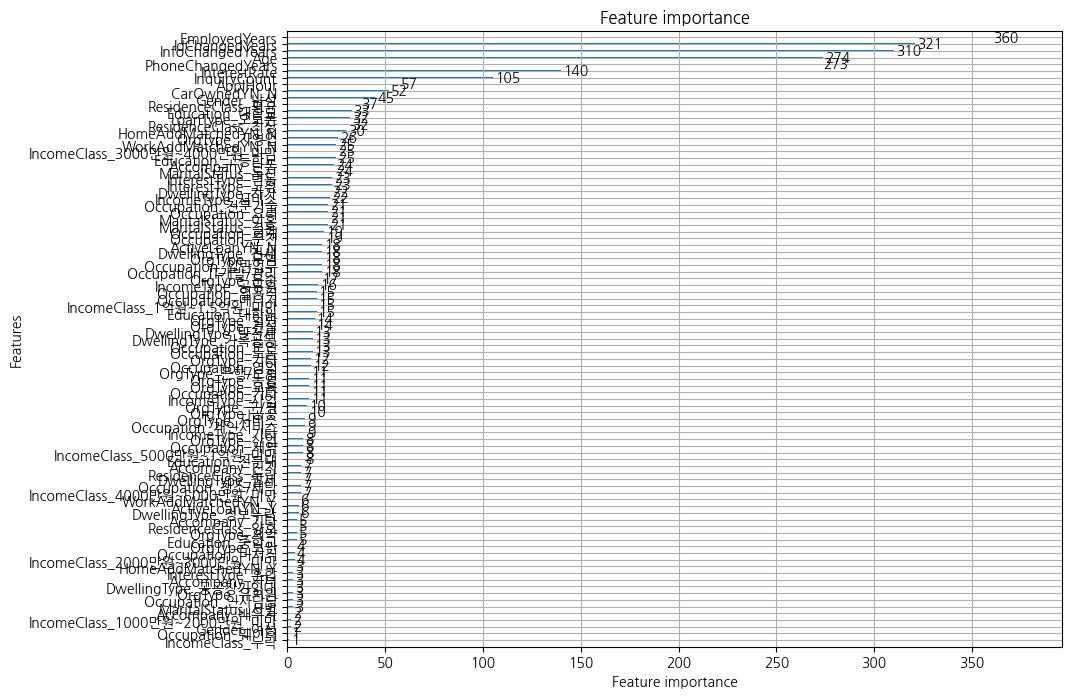

In [ ]:
# 변수 중요도 확인
from lightgbm import plot_importance
print(lgbm_uncust1.feature_name_)
print(lgbm_uncust1.feature_importances_)

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_uncust1, ax=ax)

### CatBoost

In [ ]:
df_gb = df.drop(['ApplWeek','HousingType','HouseOwnYN','LoanAmount', 'LoanRemainAmount', 'InstallAmount', 'LoanAmount', 'LoanRemainTerm', 'LoanTerm', 'Deposit', 'CarPrice', 'ChildCount', 'FamilyCount','ScoreA','ScoreB','ScoreC'],axis = 1)

In [ ]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_gb)
df_raw_dummy

,Age,EmployedYears,Default,ApplHour,InterestRate,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,Gender_남성,...,Accompany_배우자,Accompany_자녀,Accompany_친지,InterestType_고정,InterestType_변동,InterestType_혼합,HomeAddMatchedYN_N,HomeAddMatchedYN_Y,WorkAddMatchedYN_N,WorkAddMatchedYN_Y
0,21.0,2.3,0,10,6.10,1,1.0,10.3,0.0,0,...,0,0,0,0,1,0,1,0,0,1
1,21.1,1.2,0,13,6.83,1,1.0,21.1,0.4,1,...,0,0,0,0,1,0,0,1,0,1
2,21.2,1.0,0,13,4.54,0,1.1,21.1,1.7,0,...,0,0,0,0,0,1,1,0,0,1
3,21.2,3.1,0,16,6.40,1,1.1,0.0,0.0,1,...,0,0,0,1,0,0,0,1,0,1
4,21.3,1.7,0,14,6.50,2,1.2,21.2,1.1,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94204,66.4,17.8,0,10,4.43,4,13.1,0.0,2.3,1,...,0,0,0,0,1,0,0,1,0,1
94219,67.2,NaN,0,18,5.10,1,12.1,6.8,0.0,1,...,0,0,0,0,1,0,0,1,0,1
94222,67.3,NaN,0,10,4.30,4,10.8,50.9,1.1,1,...,0,0,0,0,1,0,0,1,0,1
94229,67.8,2.5,0,14,4.39,0,12.1,8.6,4.3,1,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("Default", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["Default"]

In [ ]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (79122, 99)
분할 후 설명변수 데이터 :Train (55385, 99)   Test (23737, 99)


In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# 패키지 불러오기
from catboost import CatBoostClassifier

# 변수 중요도 확인: CatBoost는 plot_importance 함수 미지원

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [ ]:
# 기본 모델 지정 및 기본 옵션 확인
cbc_uncust = CatBoostClassifier(random_state=1234)

cbc_uncust.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x7f58c4523880>>

In [ ]:
# 모델 적합
cbc_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y, cbc_pred_test)

print(classification_report(df_test_y, lgbm_pred_test, digits=3))

Learning rate set to 0.057196
0:	learn: 0.6369029	total: 62ms	remaining: 1m 1s
1:	learn: 0.5888371	total: 72.6ms	remaining: 36.2s
2:	learn: 0.5475309	total: 79.9ms	remaining: 26.6s
3:	learn: 0.5115040	total: 87.4ms	remaining: 21.8s
4:	learn: 0.4807158	total: 93.9ms	remaining: 18.7s
5:	learn: 0.4544298	total: 99.7ms	remaining: 16.5s
6:	learn: 0.4304629	total: 106ms	remaining: 15s
7:	learn: 0.4109068	total: 111ms	remaining: 13.8s
8:	learn: 0.3942905	total: 115ms	remaining: 12.7s
9:	learn: 0.3793661	total: 121ms	remaining: 12s
10:	learn: 0.3666120	total: 127ms	remaining: 11.4s
11:	learn: 0.3557346	total: 132ms	remaining: 10.9s
12:	learn: 0.3460355	total: 138ms	remaining: 10.5s
13:	learn: 0.3377388	total: 144ms	remaining: 10.1s
14:	learn: 0.3304091	total: 150ms	remaining: 9.84s
15:	learn: 0.3238997	total: 156ms	remaining: 9.57s
16:	learn: 0.3181418	total: 161ms	remaining: 9.31s
17:	learn: 0.3129936	total: 167ms	remaining: 9.09s
18:	learn: 0.3087409	total: 173ms	remaining: 8.92s
19:	learn: 

164:	learn: 0.2621501	total: 996ms	remaining: 5.04s
165:	learn: 0.2621095	total: 1s	remaining: 5.03s
166:	learn: 0.2620248	total: 1.01s	remaining: 5.02s
167:	learn: 0.2619374	total: 1.01s	remaining: 5.01s
168:	learn: 0.2619067	total: 1.02s	remaining: 5.02s
169:	learn: 0.2618347	total: 1.03s	remaining: 5.01s
170:	learn: 0.2617848	total: 1.03s	remaining: 5s
171:	learn: 0.2617414	total: 1.04s	remaining: 4.99s
172:	learn: 0.2616236	total: 1.04s	remaining: 4.99s
173:	learn: 0.2615084	total: 1.05s	remaining: 4.98s
174:	learn: 0.2614235	total: 1.05s	remaining: 4.97s
175:	learn: 0.2613917	total: 1.06s	remaining: 4.96s
176:	learn: 0.2612606	total: 1.06s	remaining: 4.95s
177:	learn: 0.2611973	total: 1.07s	remaining: 4.94s
178:	learn: 0.2611040	total: 1.08s	remaining: 4.94s
179:	learn: 0.2610270	total: 1.08s	remaining: 4.93s
180:	learn: 0.2609716	total: 1.09s	remaining: 4.92s
181:	learn: 0.2608927	total: 1.09s	remaining: 4.91s
182:	learn: 0.2607889	total: 1.1s	remaining: 4.9s
183:	learn: 0.260684

347:	learn: 0.2492198	total: 2s	remaining: 3.75s
348:	learn: 0.2491725	total: 2.01s	remaining: 3.74s
349:	learn: 0.2491221	total: 2.01s	remaining: 3.74s
350:	learn: 0.2490247	total: 2.02s	remaining: 3.73s
351:	learn: 0.2489703	total: 2.02s	remaining: 3.73s
352:	learn: 0.2489250	total: 2.03s	remaining: 3.72s
353:	learn: 0.2488482	total: 2.03s	remaining: 3.71s
354:	learn: 0.2488008	total: 2.04s	remaining: 3.71s
355:	learn: 0.2487638	total: 2.04s	remaining: 3.7s
356:	learn: 0.2486886	total: 2.05s	remaining: 3.69s
357:	learn: 0.2486564	total: 2.06s	remaining: 3.69s
358:	learn: 0.2485666	total: 2.06s	remaining: 3.68s
359:	learn: 0.2485458	total: 2.07s	remaining: 3.67s
360:	learn: 0.2484831	total: 2.07s	remaining: 3.67s
361:	learn: 0.2484138	total: 2.08s	remaining: 3.66s
362:	learn: 0.2483268	total: 2.08s	remaining: 3.65s
363:	learn: 0.2482737	total: 2.09s	remaining: 3.65s
364:	learn: 0.2482031	total: 2.09s	remaining: 3.64s
365:	learn: 0.2481421	total: 2.1s	remaining: 3.63s
366:	learn: 0.248

527:	learn: 0.2385146	total: 3.01s	remaining: 2.69s
528:	learn: 0.2384772	total: 3.01s	remaining: 2.68s
529:	learn: 0.2384429	total: 3.02s	remaining: 2.68s
530:	learn: 0.2383634	total: 3.02s	remaining: 2.67s
531:	learn: 0.2383426	total: 3.03s	remaining: 2.67s
532:	learn: 0.2382847	total: 3.04s	remaining: 2.66s
533:	learn: 0.2382217	total: 3.04s	remaining: 2.65s
534:	learn: 0.2381587	total: 3.05s	remaining: 2.65s
535:	learn: 0.2381041	total: 3.05s	remaining: 2.64s
536:	learn: 0.2380545	total: 3.06s	remaining: 2.64s
537:	learn: 0.2379837	total: 3.06s	remaining: 2.63s
538:	learn: 0.2379321	total: 3.07s	remaining: 2.63s
539:	learn: 0.2378895	total: 3.08s	remaining: 2.62s
540:	learn: 0.2378131	total: 3.08s	remaining: 2.62s
541:	learn: 0.2377612	total: 3.09s	remaining: 2.61s
542:	learn: 0.2377206	total: 3.1s	remaining: 2.6s
543:	learn: 0.2376286	total: 3.1s	remaining: 2.6s
544:	learn: 0.2375743	total: 3.11s	remaining: 2.59s
545:	learn: 0.2374932	total: 3.11s	remaining: 2.59s
546:	learn: 0.23

696:	learn: 0.2293125	total: 4s	remaining: 1.74s
697:	learn: 0.2292770	total: 4.01s	remaining: 1.73s
698:	learn: 0.2292298	total: 4.01s	remaining: 1.73s
699:	learn: 0.2291678	total: 4.02s	remaining: 1.72s
700:	learn: 0.2291379	total: 4.03s	remaining: 1.72s
701:	learn: 0.2290673	total: 4.03s	remaining: 1.71s
702:	learn: 0.2290259	total: 4.04s	remaining: 1.71s
703:	learn: 0.2289719	total: 4.04s	remaining: 1.7s
704:	learn: 0.2289296	total: 4.05s	remaining: 1.69s
705:	learn: 0.2288610	total: 4.05s	remaining: 1.69s
706:	learn: 0.2288151	total: 4.06s	remaining: 1.68s
707:	learn: 0.2287653	total: 4.07s	remaining: 1.68s
708:	learn: 0.2286980	total: 4.07s	remaining: 1.67s
709:	learn: 0.2286533	total: 4.08s	remaining: 1.67s
710:	learn: 0.2286241	total: 4.08s	remaining: 1.66s
711:	learn: 0.2285266	total: 4.09s	remaining: 1.65s
712:	learn: 0.2284516	total: 4.09s	remaining: 1.65s
713:	learn: 0.2283704	total: 4.1s	remaining: 1.64s
714:	learn: 0.2283376	total: 4.1s	remaining: 1.64s
715:	learn: 0.2282

870:	learn: 0.2206376	total: 5s	remaining: 740ms
871:	learn: 0.2205910	total: 5s	remaining: 734ms
872:	learn: 0.2205561	total: 5.01s	remaining: 729ms
873:	learn: 0.2204981	total: 5.01s	remaining: 723ms
874:	learn: 0.2204505	total: 5.02s	remaining: 717ms
875:	learn: 0.2204209	total: 5.03s	remaining: 711ms
876:	learn: 0.2203843	total: 5.03s	remaining: 706ms
877:	learn: 0.2203395	total: 5.04s	remaining: 700ms
878:	learn: 0.2202849	total: 5.04s	remaining: 694ms
879:	learn: 0.2201953	total: 5.05s	remaining: 688ms
880:	learn: 0.2201507	total: 5.05s	remaining: 683ms
881:	learn: 0.2200622	total: 5.06s	remaining: 677ms
882:	learn: 0.2200217	total: 5.06s	remaining: 671ms
883:	learn: 0.2199758	total: 5.07s	remaining: 665ms
884:	learn: 0.2199253	total: 5.08s	remaining: 660ms
885:	learn: 0.2198533	total: 5.08s	remaining: 654ms
886:	learn: 0.2198289	total: 5.09s	remaining: 648ms
887:	learn: 0.2197587	total: 5.09s	remaining: 642ms
888:	learn: 0.2197090	total: 5.1s	remaining: 636ms
889:	learn: 0.21969

In [ ]:
# 변수 중요도 확인
print(cbc_uncust.feature_names_)
print(cbc_uncust.feature_importances_)
# print(cbc_stop.get_feature_importance())

['Age', 'EmployedYears', 'ApplHour', 'InterestRate', 'InquiryCount', 'IdChangedYears', 'InfoChangedYears', 'PhoneChangedYears', 'Gender_남성', 'Gender_여성', 'Education_고등학교', 'Education_대학교', 'Education_대학원', 'Education_전문대', 'Education_중학교', 'MaritalStatus_결혼', 'MaritalStatus_독신', 'MaritalStatus_사별', 'MaritalStatus_이혼', 'IncomeType_공무원', 'IncomeType_기타', 'IncomeType_사업', 'IncomeType_서비스', 'IncomeClass_1.5억원 이상', 'IncomeClass_1000만원~2000만원 미만', 'IncomeClass_1억원~1.5억원 미만', 'IncomeClass_2000만원~3000만원 미만', 'IncomeClass_3000만원~4000만원 미만', 'IncomeClass_4000만원~5000만원 미만', 'IncomeClass_5000만원~1억원 미만', 'IncomeClass_누락', 'Occupation_IT개발/관리', 'Occupation_개인서비스', 'Occupation_기타', 'Occupation_노동', 'Occupation_매니저', 'Occupation_보안', 'Occupation_부동산중개인', 'Occupation_비서직', 'Occupation_영업', 'Occupation_요리', 'Occupation_운전', 'Occupation_웨이터', 'Occupation_인사담당', 'Occupation_일반업무', 'Occupation_일용직', 'Occupation_전문기술', 'Occupation_제약', 'Occupation_청소/세탁', 'Occupation_회계', 'OrgType_건설', 'OrgType_공공', 'OrgTyp

In [ ]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_cbc_importance = pd.DataFrame()
df_cbc_importance ["Feature"] = cbc_uncust.feature_names_
df_cbc_importance ["Importance"] = cbc_uncust.feature_importances_
# 중요도별로 정렬
df_cbc_importance .sort_values("Importance", ascending=False, inplace = True)
df_cbc_importance .round(3).head(20)

,Feature,Importance
0,Age,9.616
1,EmployedYears,9.253
6,InfoChangedYears,8.327
5,IdChangedYears,8.057
7,PhoneChangedYears,7.566
3,InterestRate,4.585
2,ApplHour,4.210
4,InquiryCount,3.955
11,Education_대학교,2.427
79,ResidenceClass_평균,1.465


Text(0, 0.5, '설명변수')

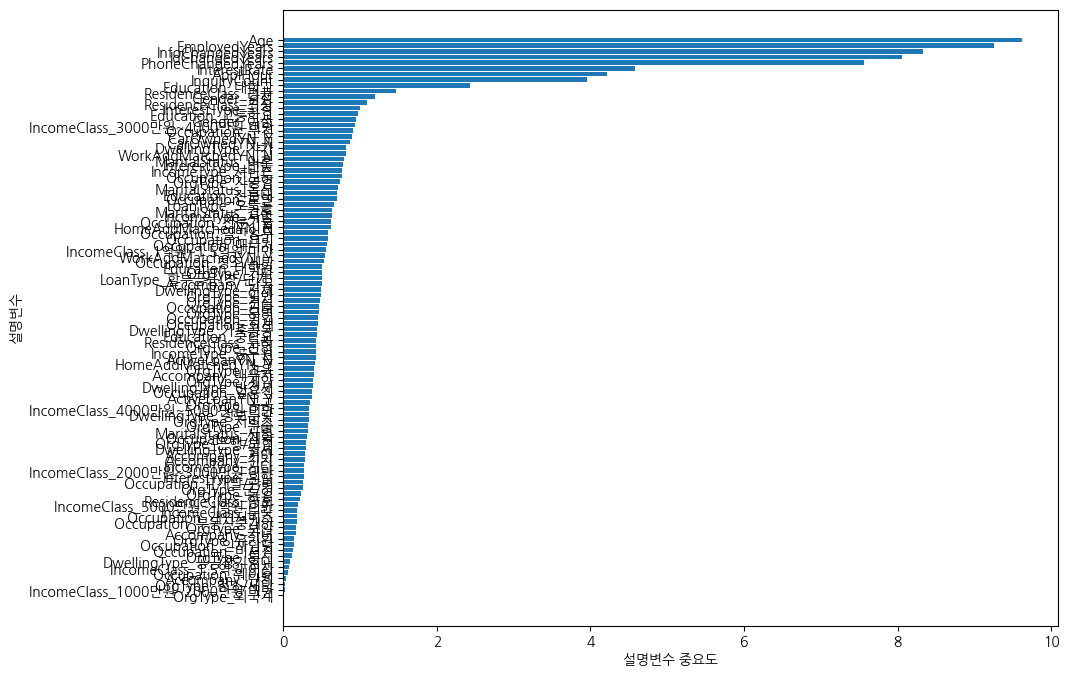

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
fig, ax = plt.subplots(figsize=(10, 8))

df_cbc_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_cbc_importance ))
plt.barh(y = coordinates, width = df_cbc_importance ["Importance"])
plt.yticks(coordinates, df_cbc_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

- 전체적으로 3개의 모델을 사용한 결과 연체고객에 대해 예측을 잘 하지 못하는 좋지 못한 성능을 가지고 있어 실제 사용할 수 있을 정도의 수준은 아닌 것으로 판단
- 전체적인 데이터 특성으로 정상상환 고객에 비해 연체고객 비율이 굉장히 적은 것으로 데이터 불균형이라고 판단되기 때문에 일어나는 문제라고 생각하였고 SMOTE 샘플링을 통하여 불균형을 해결하여 모델을 구축할 방안도 마련하였으나 이러한 경우 모델이 새로운 데이터에 대해 예측을 잘 하지 못할 것으로 판단하여 샘플링은 좋지 못하다고 판단함

- 성능은 좋지 못한 모델이지만 유의미한 결과를 도출하였음
- 변수 중요도에서 공통적으로 Age, EmployedYears, InfoChangedYears, PhoneChangedYears 등 영향을 크게 미치는 변수들을 찾을 수 있어 이후에 데이터를 더 모아 모델을 개선할 때 중요한 요소가 되는 것으로 판단됨

## 개선안 : 관리 프로세스 분류

- 연체 잠재 고객(1)
- 정상 상환 고객(0)

# Test

In [ ]:
dftest = pd.merge(dfc_test,dfloan_test, how='right',on='CustomerId')
dftest

,CustomerId,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,...,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangeYears,ScoreA,ScoreB,ScoreC
0,C271965,남성,21.2,대학교,독신,0,0,서비스,3000만원~4000만원 미만,기타,...,13500000,Y,Y,0,1.1,1.1,1.0,NaN,NaN,NaN
1,C271967,남성,21.3,대학원,결혼,5,3,서비스,5000만원~1억원 미만,기타,...,38700000,N,Y,3,1.2,7.2,1.7,NaN,NaN,NaN
2,C271968,남성,21.4,대학원,결혼,2,0,기타,2000만원~3000만원 미만,기타,...,16000000,Y,Y,0,1.2,18.0,0.4,NaN,NaN,NaN
3,C271970,남성,21.7,대학원,독신,0,0,사업,4000만원~5000만원 미만,개인서비스,...,34400000,Y,Y,1,1.6,8.0,1.1,NaN,NaN,NaN
4,C271971,남성,21.7,대학원,결혼,3,1,서비스,5000만원~1억원 미만,영업,...,27000000,Y,Y,1,1.7,1.6,1.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48050,C352746,남성,68.1,고등학교,사별,3,2,퇴직,5000만원~1억원 미만,기타,...,38500000,Y,Y,0,12.5,40.3,1.8,NaN,NaN,NaN
48051,C352750,남성,68.7,대학교,사별,3,2,퇴직,5000만원~1억원 미만,기타,...,30100000,Y,Y,6,10.4,35.0,2.1,NaN,NaN,NaN
48052,C352751,남성,68.7,대학교,사별,4,3,퇴직,5000만원~1억원 미만,기타,...,16200000,Y,Y,7,11.1,45.2,5.2,NaN,NaN,NaN
48053,C352752,남성,68.7,고등학교,사별,1,0,퇴직,1억원~1.5억원 미만,기타,...,24000000,Y,Y,0,12.3,11.2,1.9,NaN,NaN,NaN


In [ ]:
dftest = dftest.drop(['CustomerId','LoanId'], axis = 1)

In [ ]:
dftest_em = dftest[(dftest['IncomeType'] == '퇴직')]
dftest = dftest[(dftest['IncomeType'] != '퇴직')]

In [ ]:
dftest.isnull().sum()

Gender                  0
Age                     0
Education               0
MaritalStatus           0
FamilyCount             0
ChildCount              0
IncomeType              0
IncomeClass             0
Occupation              0
OrgType                 0
EmployedYears        2153
HouseOwnYN              0
DwellingType            0
HousingType             0
ResidenceClass          0
HouseAge            25027
CarOwnedYN              0
Default             40181
ActiveLoanYN            0
LoanType                0
ApplWeek                0
ApplHour                0
Accompany               0
CarPrice                0
Deposit                 0
LoanTerm                0
LoanRemainTerm          0
InterestType            0
InterestRate        40181
LoanAmount              0
InstallAmount       40181
LoanRemainAmount        0
HomeAddMatchedYN        0
WorkAddMatchedYN        0
InquiryCount            0
IdChangedYears        366
InfoChangedYears        0
PhoneChangeYears      432
ScoreA      

In [ ]:
dftest.rename(columns={'PhoneChangeYears':'PhoneChangedYears'}, inplace = True)

In [ ]:
dftest.drop('HouseAge', axis = 1, inplace = True)

In [ ]:
dftest = dftest[(dftest['IncomeClass'] != '누락')]
dftest = dftest[(dftest['ResidenceClass'] != '누락')]
dftest = dftest[(dftest['DwellingType'] != '정보누락')]

In [ ]:
dftest = dftest[~dftest['EmployedYears'].isnull()]

In [ ]:
dftest = dftest[~dftest['IdChangedYears'].isnull()]

In [ ]:
dftest = dftest[~dftest['PhoneChangedYears'].isnull()]

In [ ]:
dftest.isnull().sum()

Gender                   0
Age                      0
Education                0
MaritalStatus            0
FamilyCount              0
ChildCount               0
IncomeType               0
IncomeClass              0
Occupation               0
OrgType                  0
EmployedYears            0
HouseOwnYN               0
DwellingType             0
HousingType              0
ResidenceClass           0
CarOwnedYN               0
Default              34685
ActiveLoanYN             0
LoanType                 0
ApplWeek                 0
ApplHour                 0
Accompany                0
CarPrice                 0
Deposit                  0
LoanTerm                 0
LoanRemainTerm           0
InterestType             0
InterestRate         34685
LoanAmount               0
InstallAmount        34685
LoanRemainAmount         0
HomeAddMatchedYN         0
WorkAddMatchedYN         0
InquiryCount             0
IdChangedYears           0
InfoChangedYears         0
PhoneChangedYears        0
S

- 신규고객(test)의 경우 대출 신청 대기중인 고객이기 때문에 결측값이 100% 없는 변수 이외에 다른 변수에서 결측치라고 값을 행 제거를 통해 정제하였음

In [ ]:
dftest.drop(['ScoreA','ScoreB','ScoreC'], axis = 1, inplace =True)

In [ ]:
 dftest = dftest.reset_index(drop=True)
 dftest

,Gender,Age,Education,MaritalStatus,FamilyCount,ChildCount,IncomeType,IncomeClass,Occupation,OrgType,...,InterestRate,LoanAmount,InstallAmount,LoanRemainAmount,HomeAddMatchedYN,WorkAddMatchedYN,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears
0,남성,21.2,대학교,독신,0,0,서비스,3000만원~4000만원 미만,기타,일반,...,NaN,13500000,NaN,13500000,Y,Y,0,1.1,1.1,1.0
1,남성,21.3,대학원,결혼,5,3,서비스,5000만원~1억원 미만,기타,일반,...,NaN,38700000,NaN,38700000,N,Y,3,1.2,7.2,1.7
2,남성,21.4,대학원,결혼,2,0,기타,2000만원~3000만원 미만,기타,운송,...,NaN,16000000,NaN,16000000,Y,Y,0,1.2,18.0,0.4
3,남성,21.7,대학원,독신,0,0,사업,4000만원~5000만원 미만,개인서비스,서비스,...,NaN,34400000,NaN,34400000,Y,Y,1,1.6,8.0,1.1
4,남성,21.7,대학원,결혼,3,1,서비스,5000만원~1억원 미만,영업,은행/보험,...,NaN,27000000,NaN,27000000,Y,Y,1,1.7,1.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34680,남성,64.4,중학교,독신,0,0,사업,5000만원~1억원 미만,제약,제약,...,NaN,30000000,NaN,30000000,Y,Y,0,12.0,14.8,0.0
34681,여성,65.2,대학교,결혼,4,2,사업,1.5억원 이상,매니저,자영업,...,NaN,44000000,NaN,44000000,Y,Y,4,11.6,8.9,4.3
34682,여성,65.2,대학교,결혼,5,3,사업,1.5억원 이상,매니저,자영업,...,NaN,38500000,NaN,38500000,Y,Y,4,11.6,8.9,4.3
34683,남성,65.9,고등학교,독신,1,0,서비스,5000만원~1억원 미만,청소/세탁,일반,...,NaN,41600000,NaN,41600000,Y,Y,0,12.0,36.8,1.2


In [ ]:
dftest['Accompany'] = np.where(dftest['Accompany'].isin(['배우자', '친지', '기타', '자녀', '단체']), '동행자 있음', '단독')
dftest['Accompany']

0            단독
1            단독
2        동행자 있음
3            단독
4            단독
          ...  
34680        단독
34681        단독
34682        단독
34683        단독
34684        단독
Name: Accompany, Length: 34685, dtype: object

In [ ]:
dftest.isnull().sum()

Gender                   0
Age                      0
Education                0
MaritalStatus            0
FamilyCount              0
ChildCount               0
IncomeType               0
IncomeClass              0
Occupation               0
OrgType                  0
EmployedYears            0
HouseOwnYN               0
DwellingType             0
HousingType              0
ResidenceClass           0
CarOwnedYN               0
Default              34685
ActiveLoanYN             0
LoanType                 0
ApplWeek                 0
ApplHour                 0
Accompany                0
CarPrice                 0
Deposit                  0
LoanTerm                 0
LoanRemainTerm           0
InterestType             0
InterestRate         34685
LoanAmount               0
InstallAmount        34685
LoanRemainAmount         0
HomeAddMatchedYN         0
WorkAddMatchedYN         0
InquiryCount             0
IdChangedYears           0
InfoChangedYears         0
PhoneChangedYears        0
d

In [ ]:
dftest = dftest.drop(['Default', 'InterestRate','InstallAmount'], axis=1)

In [ ]:
df_test_x = pd.get_dummies(dftest)

In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
print(dftest.columns)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

Index(['Age', 'FamilyCount', 'ChildCount', 'EmployedYears', 'ApplHour',
       'CarPrice', 'Deposit', 'LoanTerm', 'LoanRemainTerm', 'LoanAmount',
       ...
       'ApplWeek_화', 'Accompany_단독', 'Accompany_동행자 있음', 'InterestType_고정',
       'InterestType_변동', 'InterestType_혼합', 'HomeAddMatchedYN_N',
       'HomeAddMatchedYN_Y', 'WorkAddMatchedYN_N', 'WorkAddMatchedYN_Y'],
      dtype='object', length=109)
train data X size : (55385, 99)
train data Y size : (55385,)
test data X size : (23737, 99)
test data Y size : (23737,)


In [ ]:
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (55385, 99)
train data Y size : (55385,)
test data X size : (23737, 99)
test data Y size : (23737,)


In [ ]:
params = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

X_train, X_valid, y_train, y_valid = train_test_split(df_train_x, df_train_y, test_size=0.2)

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

In [ ]:
num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data, valid_data])

/home/piai/anaconda3/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1278
[LightGBM] [Info] Number of data points in the train set: 44308, number of used features: 98
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM

In [ ]:
# 테스트 데이터 로드 또는 생성
X_test= df_test_x
# 모델을 사용하여 예측

In [ ]:
X_test

,Age,EmployedYears,ApplHour,InterestRate,InquiryCount,IdChangedYears,InfoChangedYears,PhoneChangedYears,Gender_남성,Gender_여성,...,Accompany_배우자,Accompany_자녀,Accompany_친지,InterestType_고정,InterestType_변동,InterestType_혼합,HomeAddMatchedYN_N,HomeAddMatchedYN_Y,WorkAddMatchedYN_N,WorkAddMatchedYN_Y
46606,28.5,2.0,17,4.30,4,8.4,12.1,1.9,1,0,...,1,0,0,0,1,0,0,1,0,1
90975,54.5,4.7,15,4.30,4,9.3,17.4,1.3,1,0,...,0,0,0,0,1,0,0,1,0,1
33083,26.0,0.8,15,2.09,0,5.9,8.5,0.0,0,1,...,0,0,0,0,1,0,0,1,0,1
85783,45.6,6.7,10,4.30,1,0.5,20.9,8.2,1,0,...,0,0,0,0,1,0,0,1,0,1
13697,43.9,0.5,15,4.39,0,13.3,4.9,0.0,1,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53182,27.4,0.5,16,5.10,0,7.3,3.5,5.7,1,0,...,0,0,0,0,1,0,0,1,0,1
68136,28.7,4.5,18,4.30,2,8.0,5.8,0.8,0,1,...,1,0,0,0,1,0,0,1,1,0
38157,38.5,2.3,15,2.13,0,13.7,8.7,3.1,0,1,...,0,0,0,0,1,0,1,0,0,1
81105,27.1,1.7,12,4.43,0,5.4,4.9,8.0,1,0,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
predictions = bst.predict(X_test, num_iteration=bst.best_iteration)

In [ ]:
# 예측값 (이진 분류의 경우 0 또는 1)
binary_predictions = (predictions > 0.4).astype(int)

# 예측 확률
predictions[predictions < 0] = 0.01
prediction_probabilities = predictions

# 결과 확인
results = pd.DataFrame({'Prediction': binary_predictions, 'Probability': prediction_probabilities})
results

,Prediction,Probability
0,0,0.115389
1,0,0.047619
2,0,0.040757
3,0,0.034618
4,0,0.379680
...,...,...
23732,0,0.049554
23733,0,0.105353
23734,0,0.150446
23735,0,0.075694


- 실제 정상상환 고객으로 분류하였을 때 확률(probability)와 함께 고객이 정상 고객일 확률을 나타내 주고 있음

In [ ]:
results['Prediction'].value_counts()

0    23729
1        8
Name: Prediction, dtype: int64

In [ ]:
results[results['Prediction'] == 1]

,Prediction,Probability
3535,1,0.604844
3694,1,0.404057
11492,1,0.507969
11741,1,0.446662
12962,1,0.493114
16258,1,0.449517
19647,1,0.415692
21749,1,0.523392
23219,1,0.445194


- 예측을 연체할 고객으로 분류를 하였을 때 이 고객이 실제 연체할 확률과 함께 데이터프레임으로 볼 수 있음